In [25]:
import sys
import numpy as np
import os
from unet_baseline import CustomCNN
from image_utils import standardize
from IOU_computations import *
from numpy import newaxis
import matplotlib.pyplot as plt
from dataset_generator import DatasetGenerator



In [26]:
def plot_summary(predictions,labels,pansharp,batch_size,batch_number,prediction_path):
    
    fig,axs=plt.subplots(3, batch_size,figsize=(8*batch_size,24))

    axs[0,0].set_title(str(batch_number)+' Pansharpened ', fontsize='large')
    axs[1,0].set_title(str(batch_number)+' Groundtruth ', fontsize='large')
    axs[2,0].set_title(str(batch_number)+' Predictions ', fontsize='large')

        
    for i in range(batch_size):
        
        axs[0,i].imshow(pansharp[i])
        plt.imsave(prediction_path+'_'+str(batch_number)+'_Pansharpened_'+str(i)+'.jpg',pansharp[i])
        axs[1,i].imshow(labels[i,:,:,0])
        plt.imsave(prediction_path+'_'+str(batch_number)+'_Groundtruth_'+str(i)+'.jpg',labels[i,:,:,0])
        logits=np.argmax(predictions, 3)
        axs[2,i].imshow(1-logits[i,:,:])
        plt.imsave(prediction_path+'_'+str(batch_number)+'_Predictions_'+str(i)+'.jpg',1-logits[i,:,:])

    plt.subplots_adjust()
    plt.show()


In [27]:
def predict_tf(path_validation,validation_batch_size,number_of_batches,restore_path,prediction_path):
    
    TMP_IOU=prediction_path+'TMP_IOU/'
    if not os.path.exists(TMP_IOU):
            os.makedirs(TMP_IOU)
    model=CustomCNN()
    
    
    val_generator = DatasetGenerator.from_root_folder(path_validation, batch_size=validation_batch_size)
    val_generator=val_generator.shuffled()
    val_generator=val_generator.__iter__()
    
    
    for i in range(number_of_batches):
        X_val,Y_val=val_generator.__next__()

        predictions=[]
        for j in range(validation_batch_size):
            X_val_j=X_val[j]
            X_val_j=X_val_j[newaxis,:,:,:]
            X_val_j=standardize(X_val_j)
            Y_val_j=Y_val[j]
            Y_val_j=Y_val_j[newaxis,:,:,:]

            predictions_i,loss_i=model.predict(restore_path, X_val_j)
            iou_acc_v,f1_v,iou_v=predict_score_batch(TMP_IOU,Y_val_j[:,:,:,0],1-np.argmax(predictions_i,3))
            print("Image {:d}, Validation IoU {:.4f}, Validation IoU_acc {:.4f}%,Validation F1 IoU {:.4f}%, loss {:.8f}".format(j,iou_v,iou_acc_v,f1_v,loss_i))
            predictions.append(predictions_i)
        predictions=np.squeeze(np.asarray(predictions))
        X_val=standardize(X_val)
        pansharp=np.stack((X_val[:,:,:,5],X_val[:,:,:,3],X_val[:,:,:,2]),axis=3)
        plot_summary(predictions,Y_val,pansharp,validation_batch_size,i,prediction_path)
        

2018-04-04 12:52:39,656 Layers 4, features 32, filter size 3x3, pool size: 2x2


Image 0, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.69419956
Image 1, Validation IoU 0.5969, Validation IoU_acc 66.6667%,Validation F1 IoU 80.0000%, loss 12.39723301
Image 2, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.19625282
Image 3, Validation IoU 0.9574, Validation IoU_acc 100.0000%,Validation F1 IoU 33.3333%, loss 12.27445030
Image 4, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.35897541
Image 5, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.10671043
Image 6, Validation IoU 0.9523, Validation IoU_acc 100.0000%,Validation F1 IoU 50.0000%, loss 12.18656731
Image 7, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.07737637
Image 8, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.38914680
Image 9, Validation IoU 1.0000, Validatio

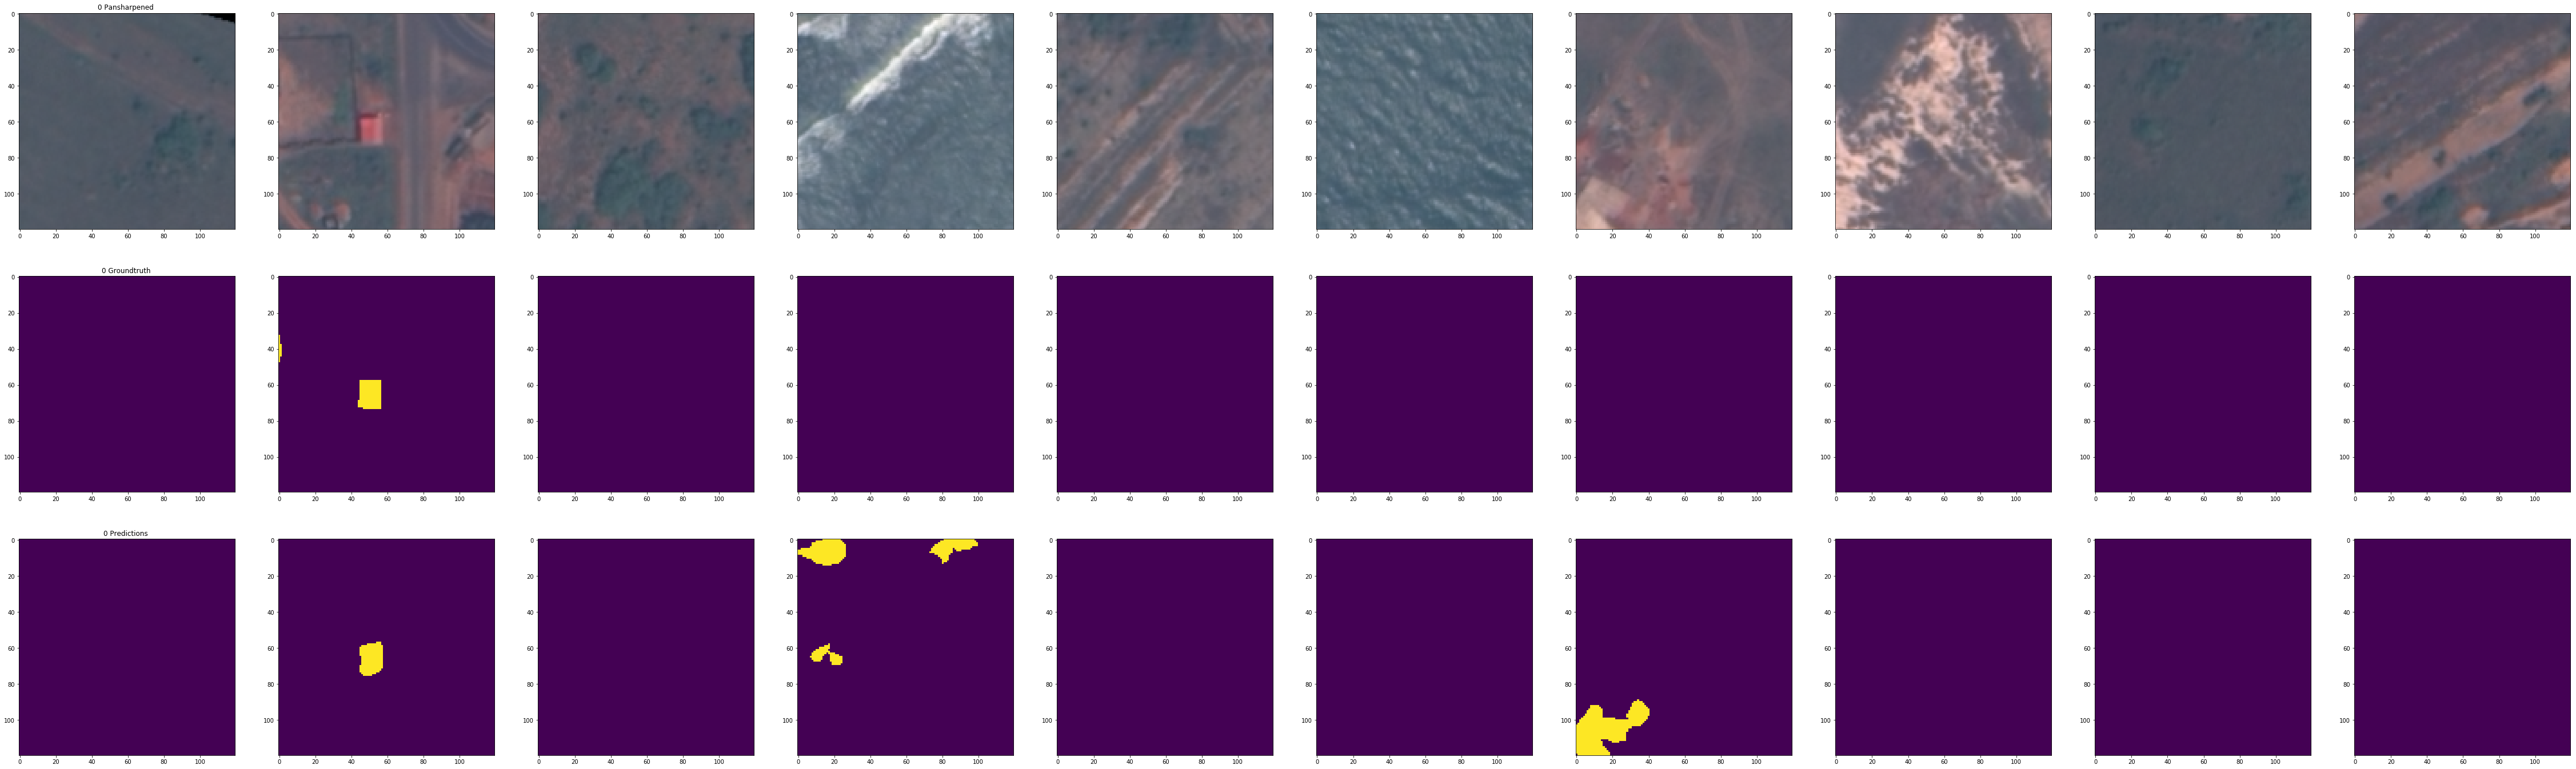

Image 0, Validation IoU 0.9742, Validation IoU_acc 100.0000%,Validation F1 IoU 80.0000%, loss 9.00188160
Image 1, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.38308811
Image 2, Validation IoU 0.9946, Validation IoU_acc 100.0000%,Validation F1 IoU 50.0000%, loss 12.17463398
Image 3, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.24949646
Image 4, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.74441719
Image 5, Validation IoU 0.9878, Validation IoU_acc 100.0000%,Validation F1 IoU 66.6667%, loss 12.47463322
Image 6, Validation IoU 0.2146, Validation IoU_acc 28.5714%,Validation F1 IoU 33.3333%, loss 11.78215504
Image 7, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.42158127
Image 8, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.27212048
Image 9, Validation IoU 0.0679, Validation 

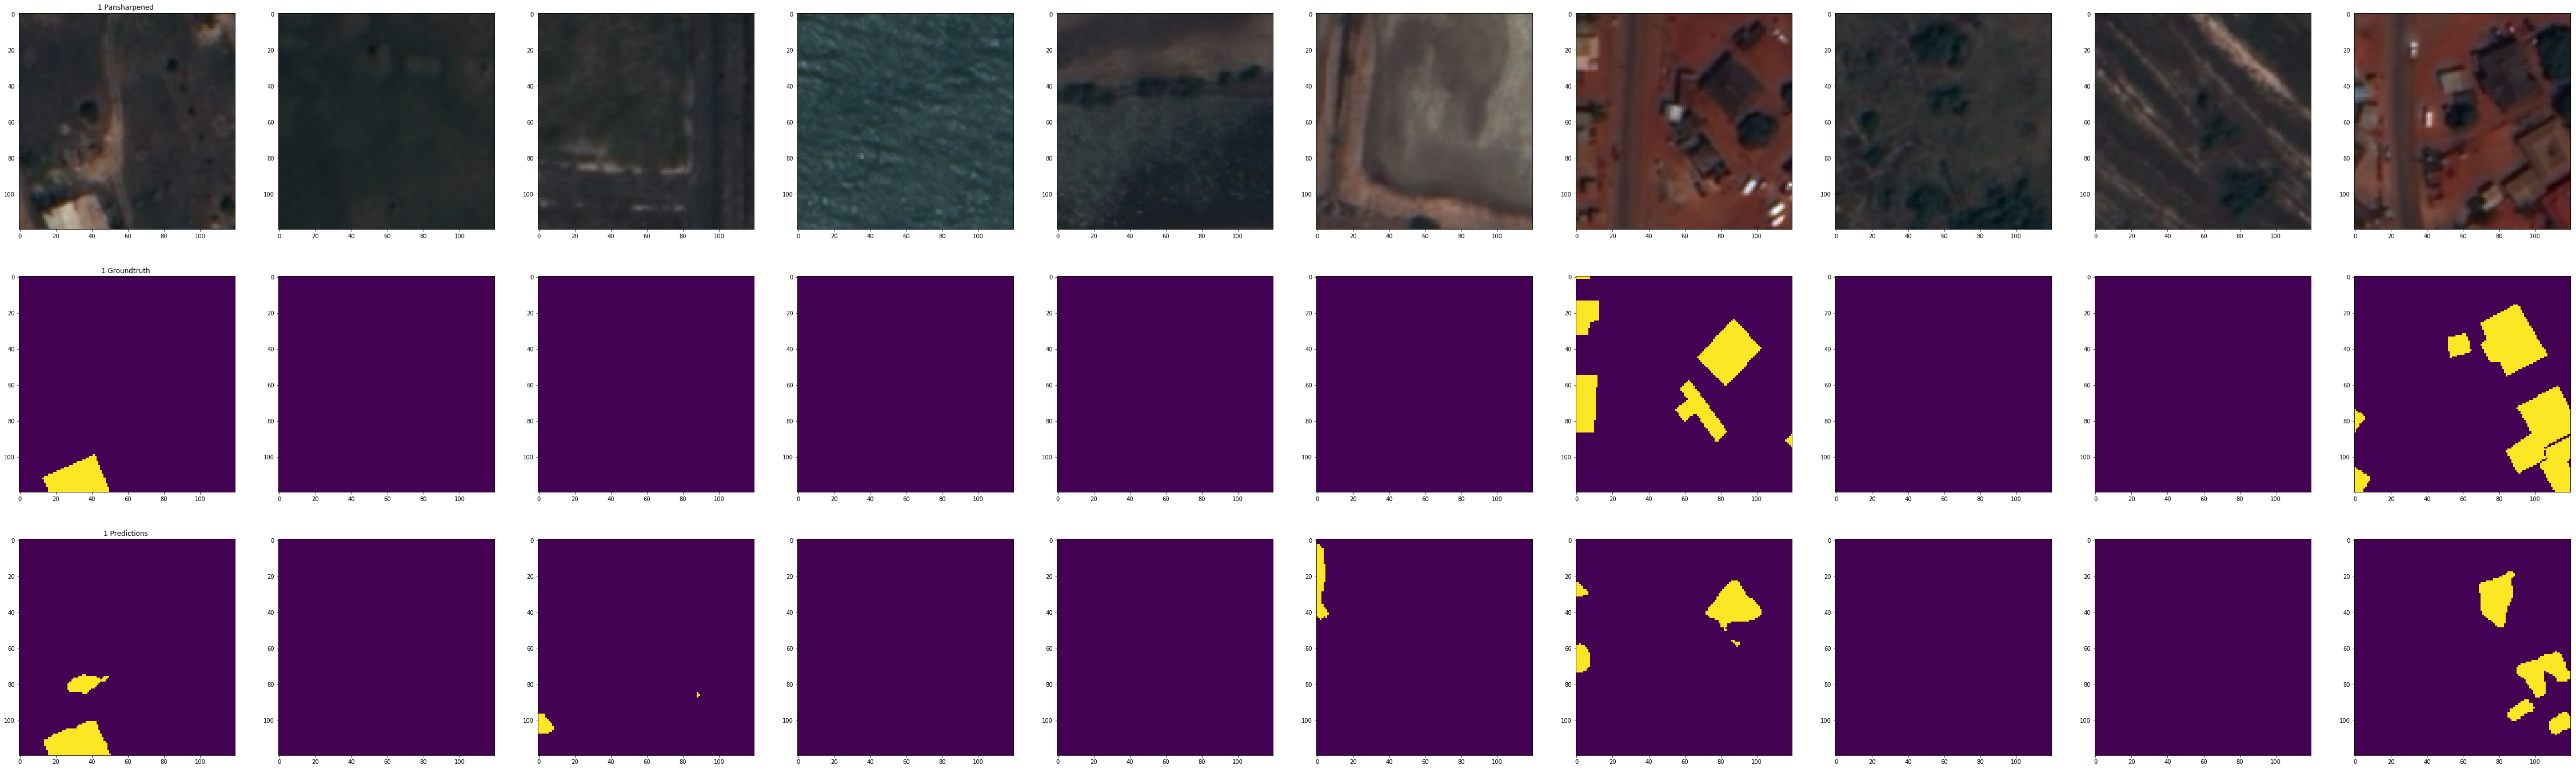

Image 0, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.54431343
Image 1, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.67279053
Image 2, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.40811920
Image 3, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.21782780
Image 4, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.16521549
Image 5, Validation IoU 0.7070, Validation IoU_acc 80.0000%,Validation F1 IoU 88.8889%, loss 11.52300262
Image 6, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.23262978
Image 7, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.49679756
Image 8, Validation IoU 0.4954, Validation IoU_acc 50.0000%,Validation F1 IoU 66.6667%, loss 12.31681252
Image 9, Validation IoU 0.9978, Validatio

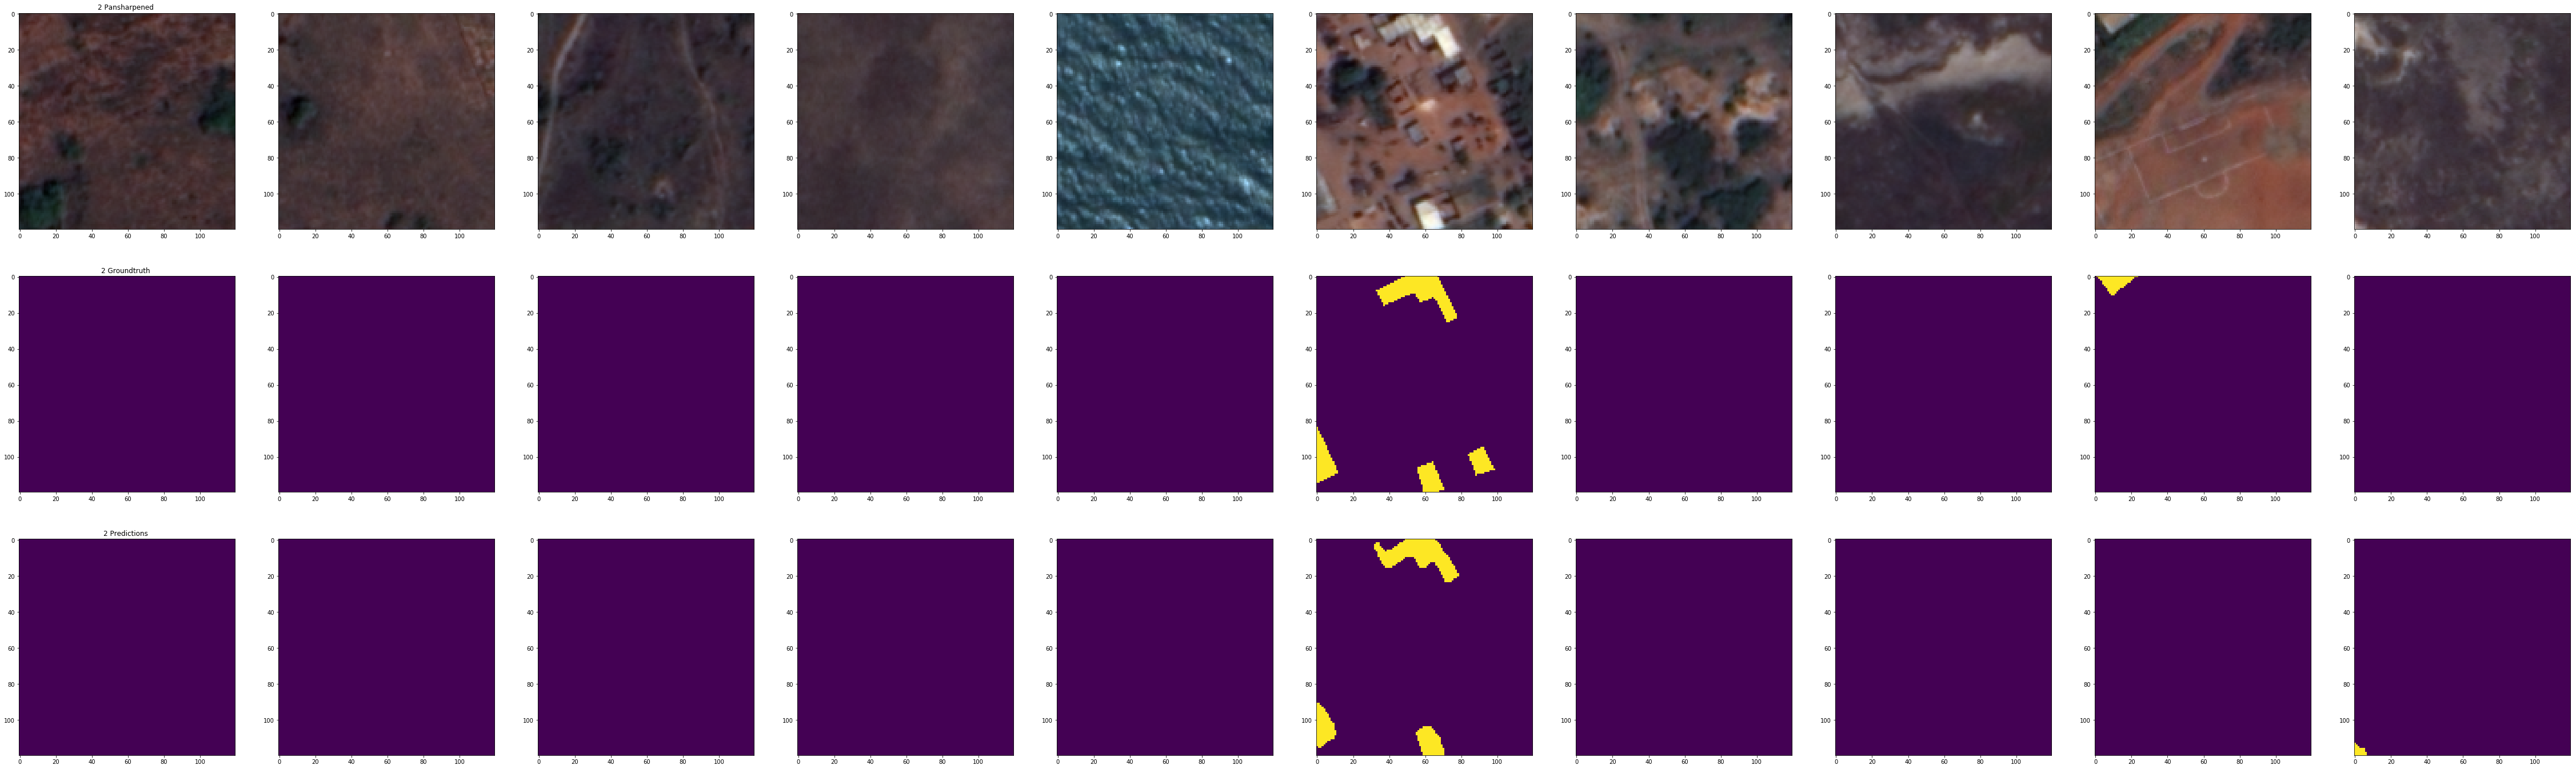

Image 0, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.27261066
Image 1, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.46918774
Image 2, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 11.98765659
Image 3, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.61617374
Image 4, Validation IoU 0.9889, Validation IoU_acc 100.0000%,Validation F1 IoU 66.6667%, loss 12.07196808
Image 5, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.68433189
Image 6, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.30033398
Image 7, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.60189629
Image 8, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.57116413
Image 9, Validation IoU 1.0000, Valida

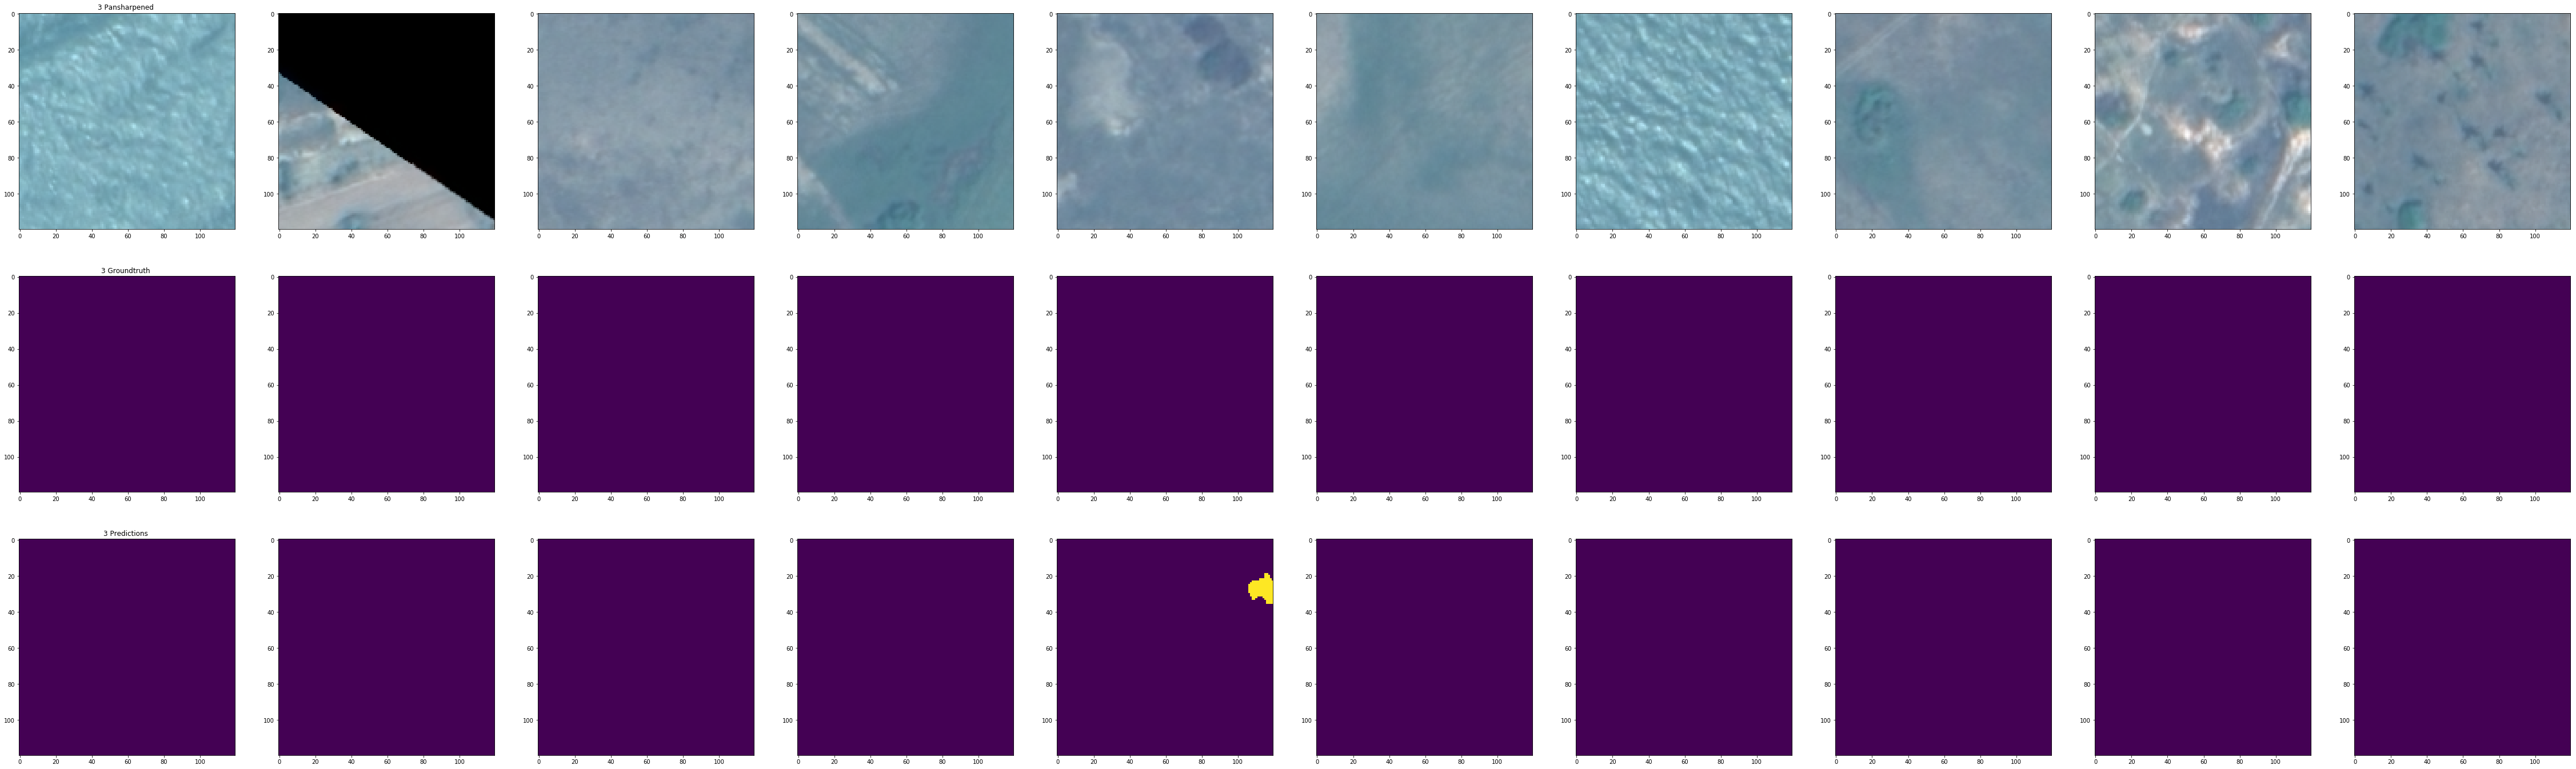

Image 0, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.46537399
Image 1, Validation IoU 0.8271, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.13748550
Image 2, Validation IoU 0.9997, Validation IoU_acc 100.0000%,Validation F1 IoU 66.6667%, loss 12.62822056
Image 3, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.37780285
Image 4, Validation IoU 0.4735, Validation IoU_acc 50.0000%,Validation F1 IoU 57.1429%, loss 12.01453018
Image 5, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.64697266
Image 6, Validation IoU 0.9235, Validation IoU_acc 100.0000%,Validation F1 IoU 15.3846%, loss 11.97486305
Image 7, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.45157433
Image 8, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.52894306
Image 9, Validation IoU 0.9907, Validatio

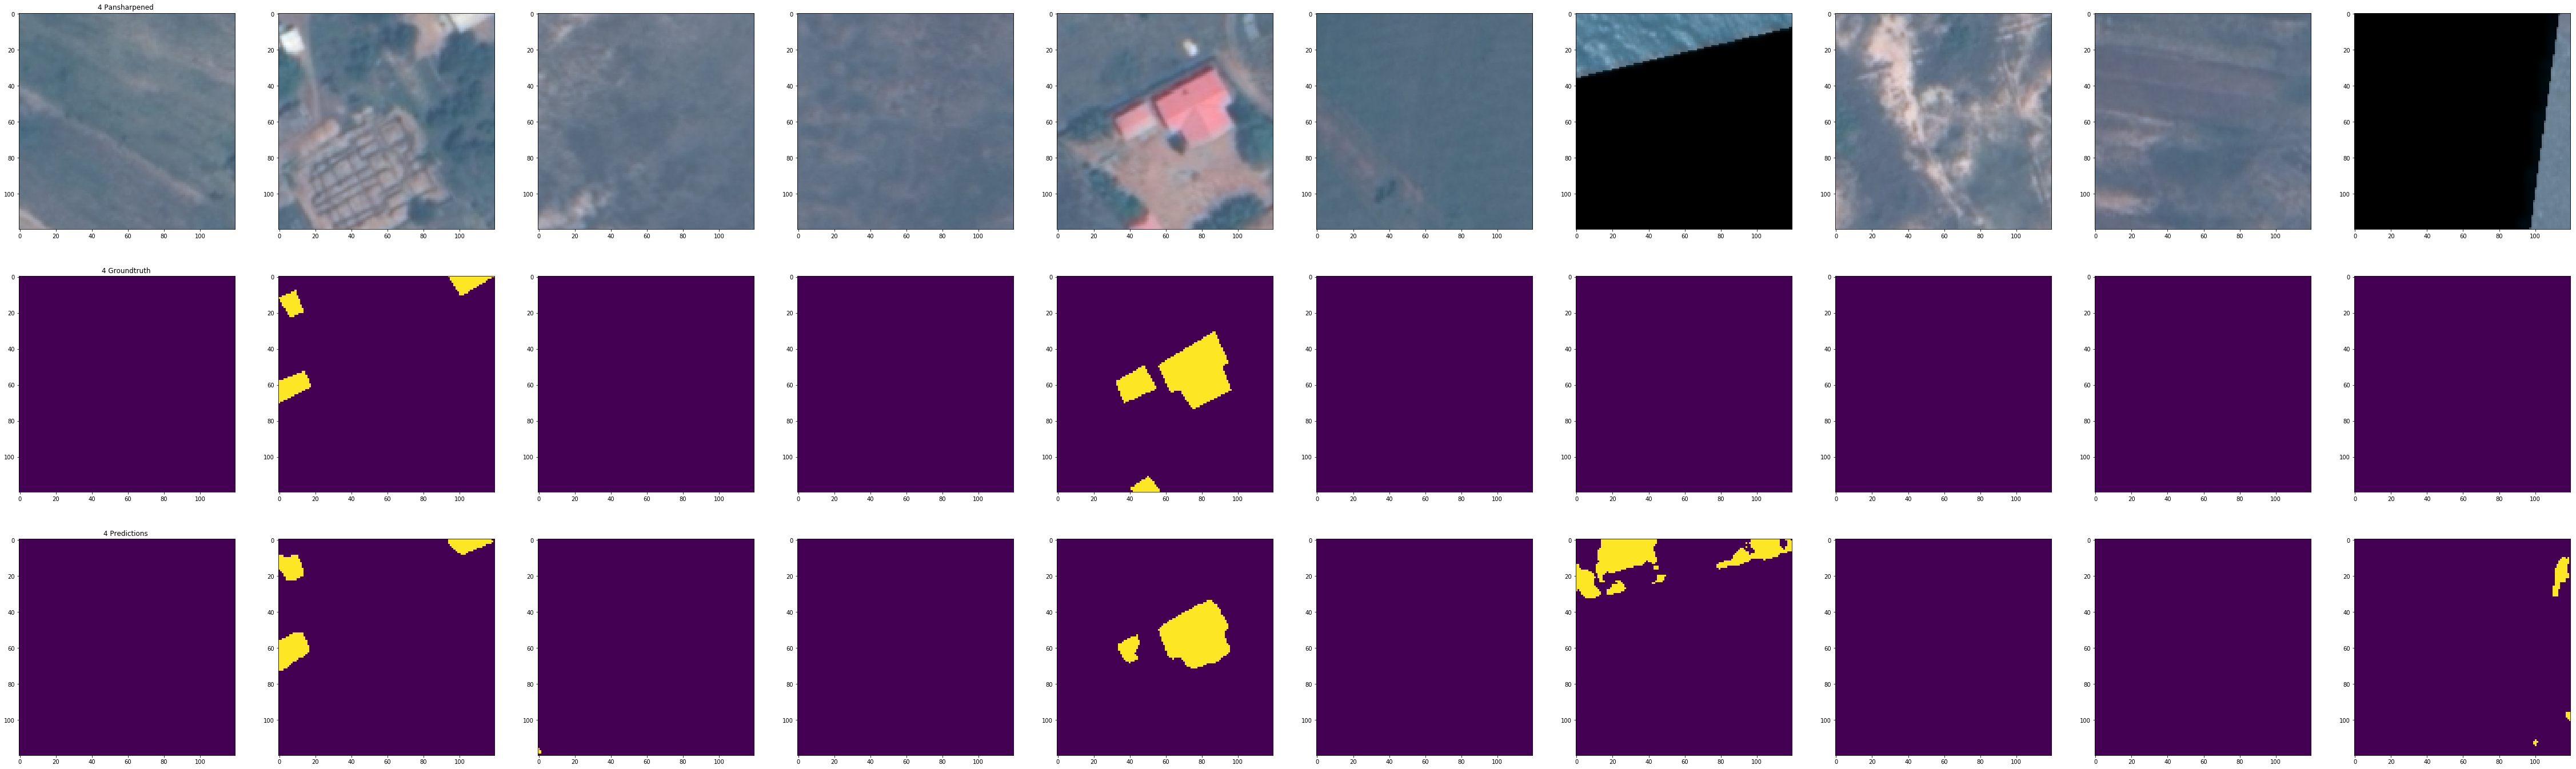

Image 0, Validation IoU 0.8277, Validation IoU_acc 100.0000%,Validation F1 IoU 92.3077%, loss 11.79301071
Image 1, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.66228008
Image 2, Validation IoU 0.9978, Validation IoU_acc 100.0000%,Validation F1 IoU 66.6667%, loss 12.35747910
Image 3, Validation IoU 0.9839, Validation IoU_acc 100.0000%,Validation F1 IoU 40.0000%, loss 12.15149307
Image 4, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.50396061
Image 5, Validation IoU 0.8602, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.05912113
Image 6, Validation IoU 0.9998, Validation IoU_acc 100.0000%,Validation F1 IoU 50.0000%, loss 12.32615471
Image 7, Validation IoU 0.9967, Validation IoU_acc 100.0000%,Validation F1 IoU 40.0000%, loss 12.06674671
Image 8, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.57004738
Image 9, Validation IoU 1.0000, Validation

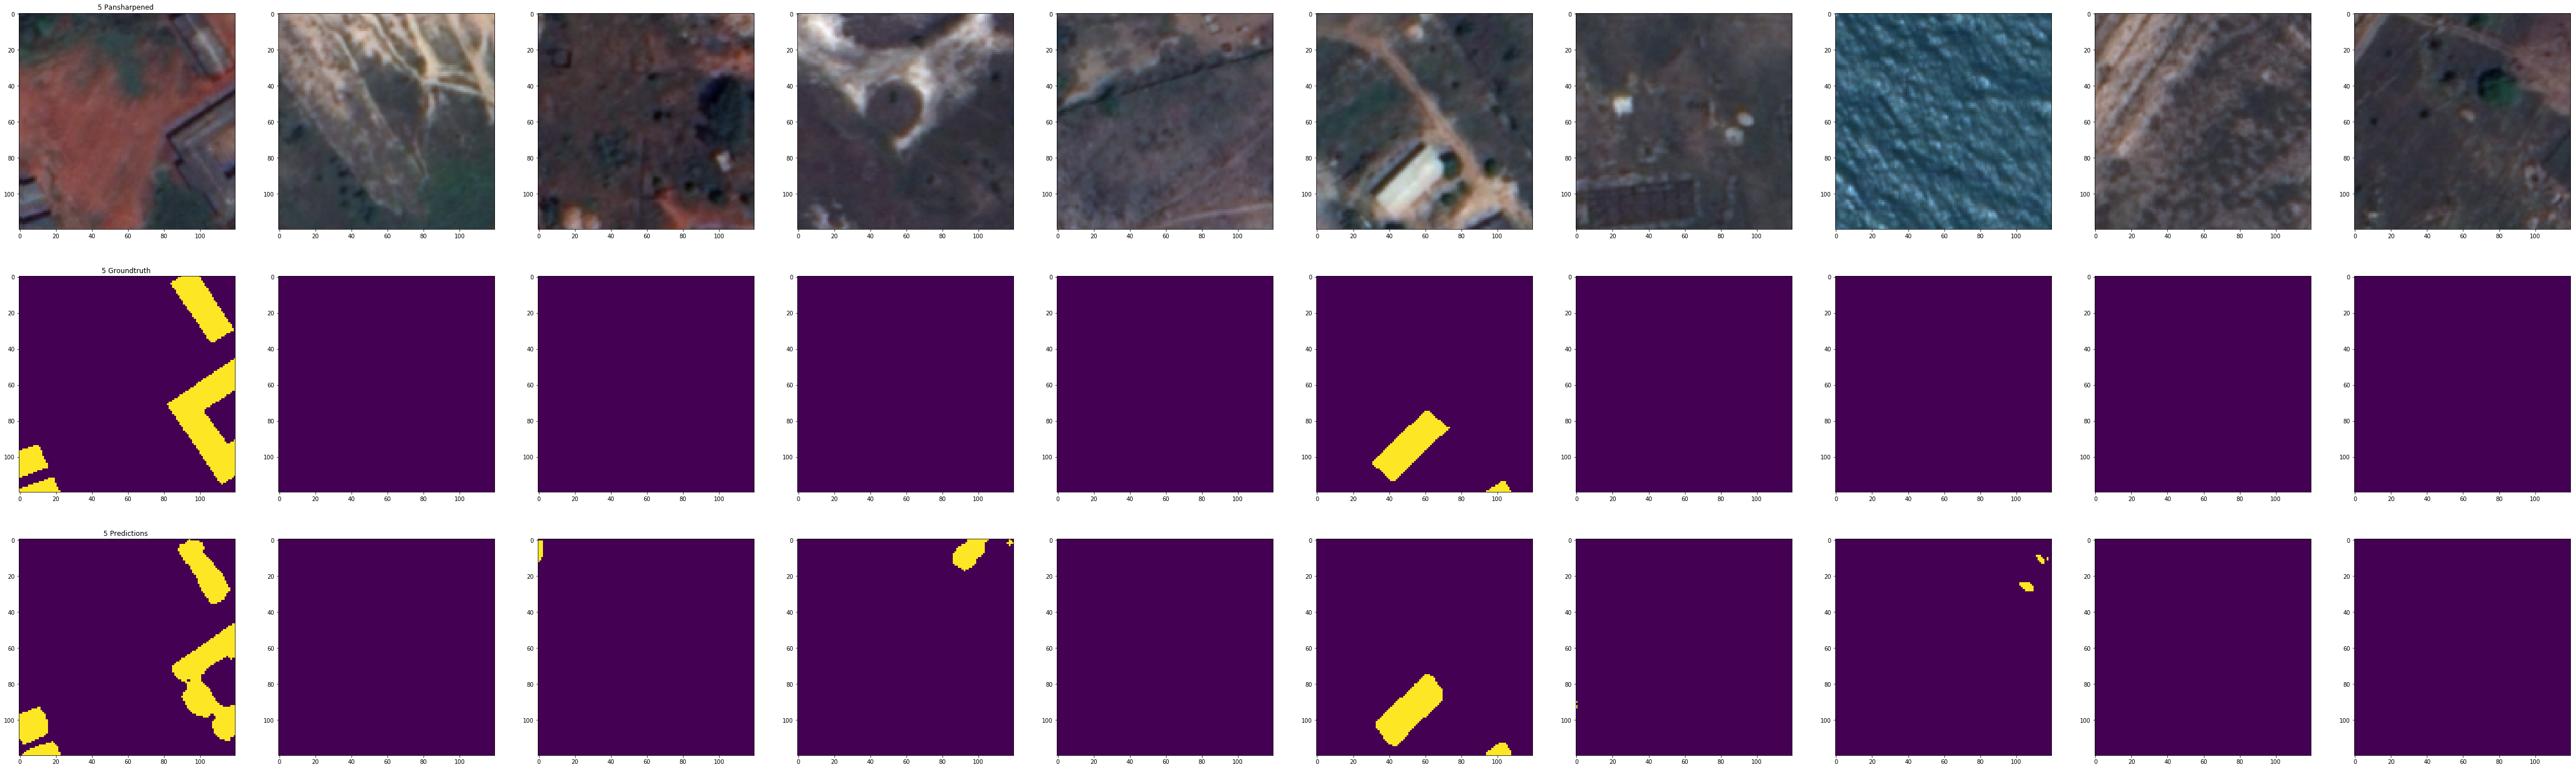

Image 0, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.68797398
Image 1, Validation IoU 0.9996, Validation IoU_acc 100.0000%,Validation F1 IoU 66.6667%, loss 12.60232353
Image 2, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.52085495
Image 3, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.36168003
Image 4, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.33509541
Image 5, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.36930561
Image 6, Validation IoU 0.9948, Validation IoU_acc 100.0000%,Validation F1 IoU 66.6667%, loss 12.55388451
Image 7, Validation IoU 0.9721, Validation IoU_acc 100.0000%,Validation F1 IoU 66.6667%, loss 12.33423424
Image 8, Validation IoU 0.4843, Validation IoU_acc 50.0000%,Validation F1 IoU 28.5714%, loss 12.00367641
Image 9, Validation IoU 0.9932, Validation

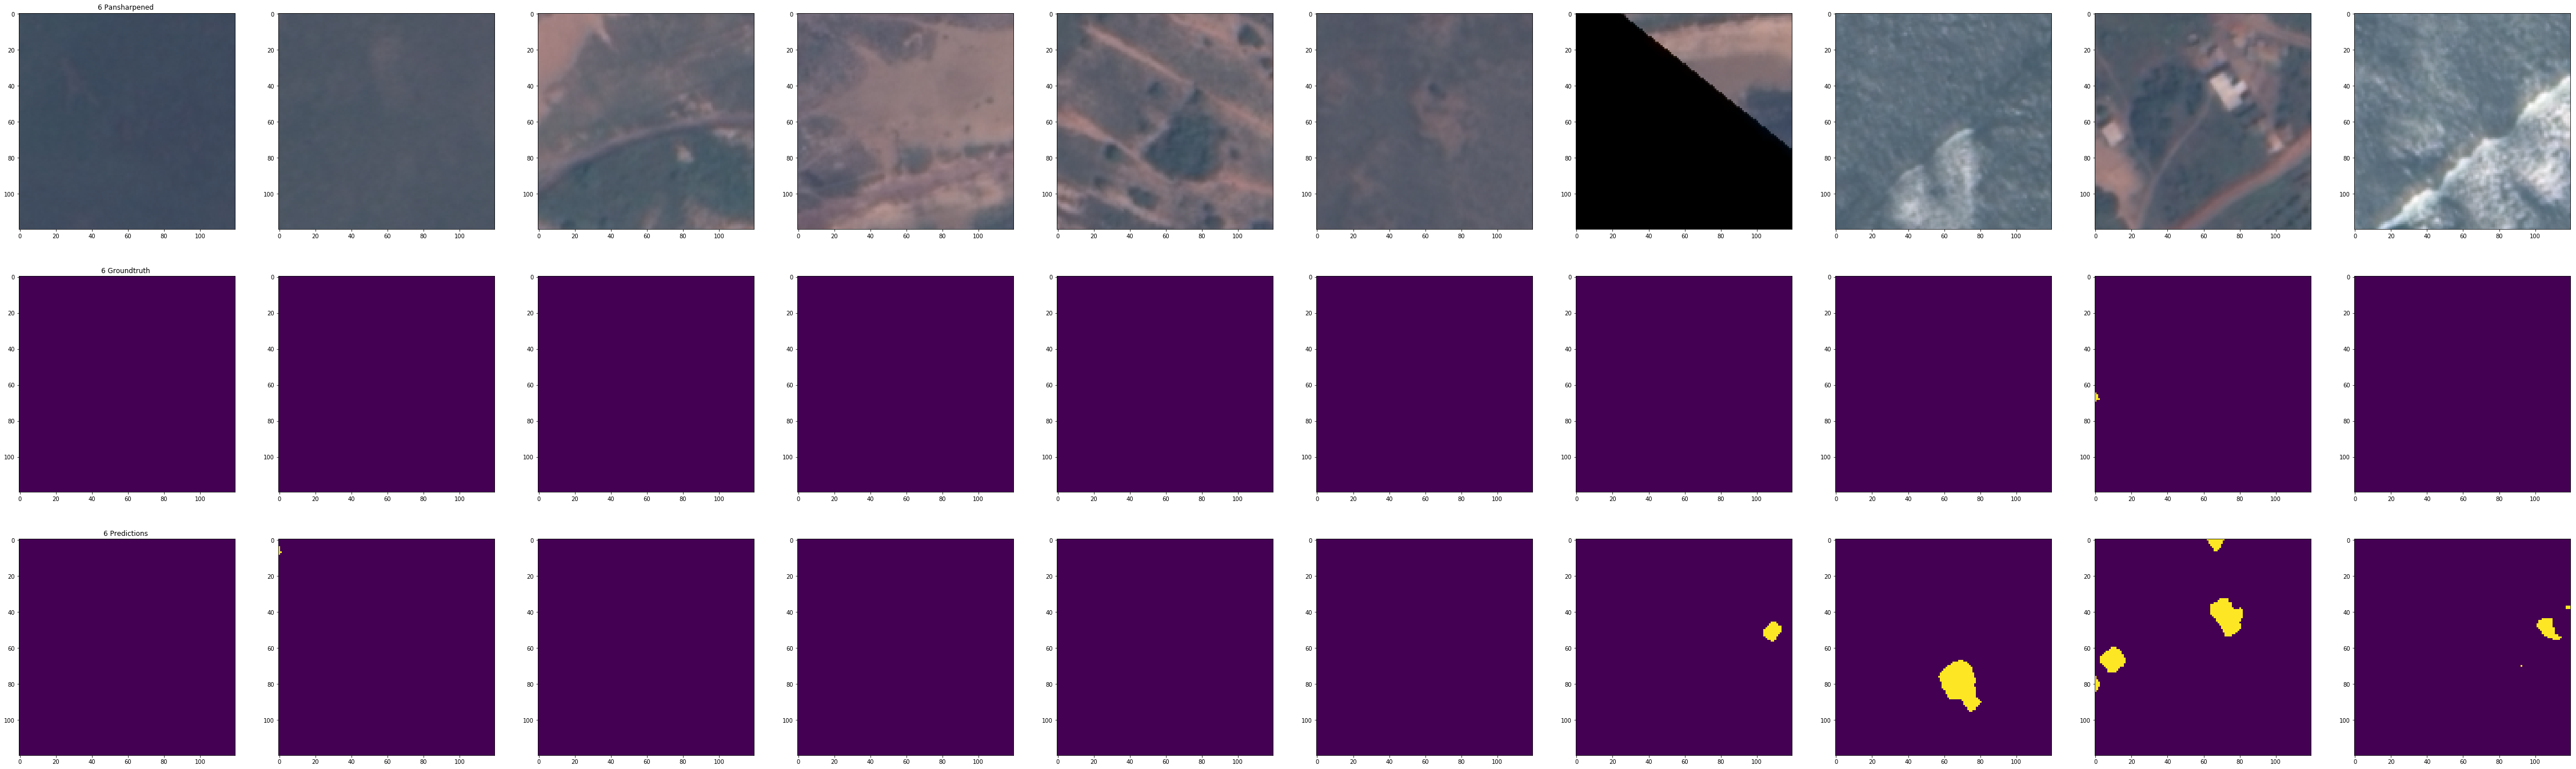

Image 0, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.43349838
Image 1, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.30882835
Image 2, Validation IoU 0.6482, Validation IoU_acc 75.0000%,Validation F1 IoU 75.0000%, loss 12.13294411
Image 3, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.46138668
Image 4, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.28395653
Image 5, Validation IoU 0.9960, Validation IoU_acc 100.0000%,Validation F1 IoU 66.6667%, loss 12.09336567
Image 6, Validation IoU 0.9984, Validation IoU_acc 100.0000%,Validation F1 IoU 66.6667%, loss 12.30582714
Image 7, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.38099194
Image 8, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.36031246
Image 9, Validation IoU 1.0000, Validatio

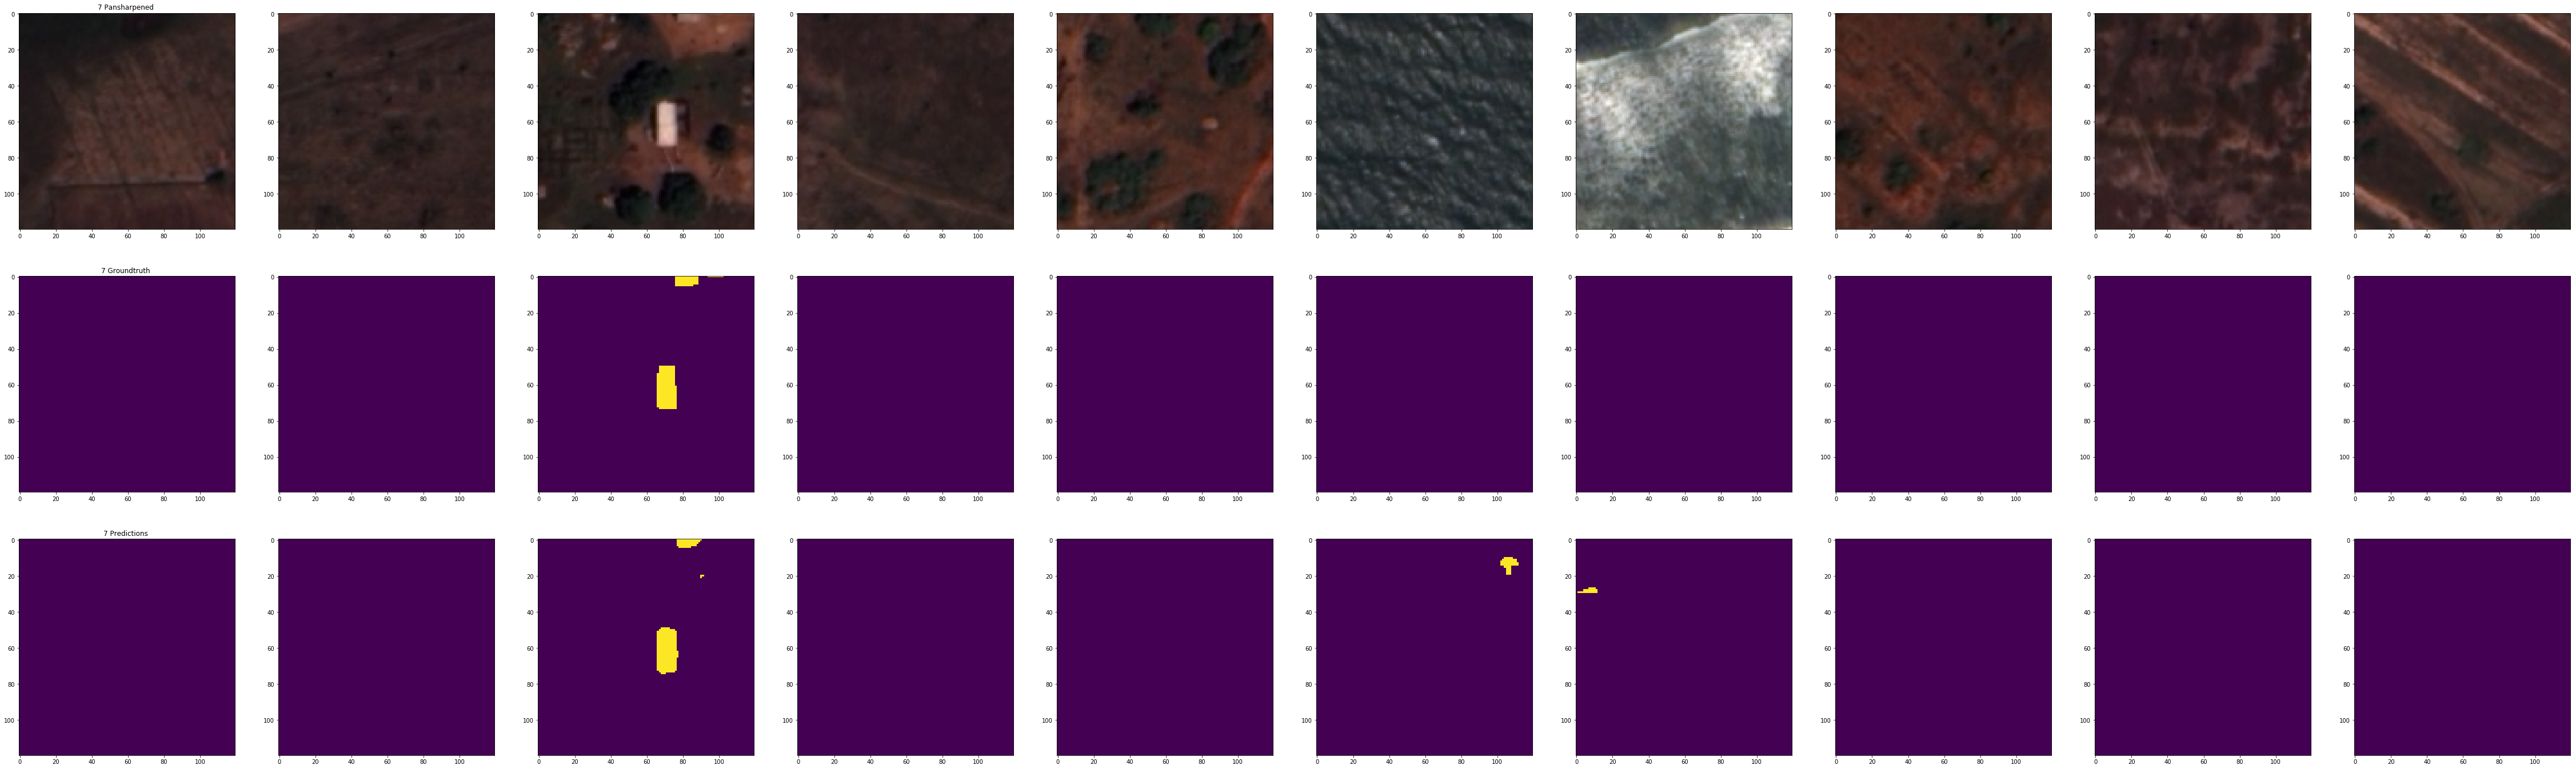

Image 0, Validation IoU 0.9993, Validation IoU_acc 100.0000%,Validation F1 IoU 66.6667%, loss 12.17955685
Image 1, Validation IoU 0.9919, Validation IoU_acc 100.0000%,Validation F1 IoU 50.0000%, loss 12.17452717
Image 2, Validation IoU 0.5239, Validation IoU_acc 66.6667%,Validation F1 IoU 75.0000%, loss 11.23647308
Image 3, Validation IoU 0.4761, Validation IoU_acc 50.0000%,Validation F1 IoU 25.0000%, loss 11.68520260
Image 4, Validation IoU 0.9983, Validation IoU_acc 100.0000%,Validation F1 IoU 66.6667%, loss 12.28837585
Image 5, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.47988701
Image 6, Validation IoU 0.9986, Validation IoU_acc 100.0000%,Validation F1 IoU 50.0000%, loss 12.23243237
Image 7, Validation IoU 0.9992, Validation IoU_acc 100.0000%,Validation F1 IoU 66.6667%, loss 12.12471008
Image 8, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.67396927
Image 9, Validation IoU 1.0000, Validation IoU

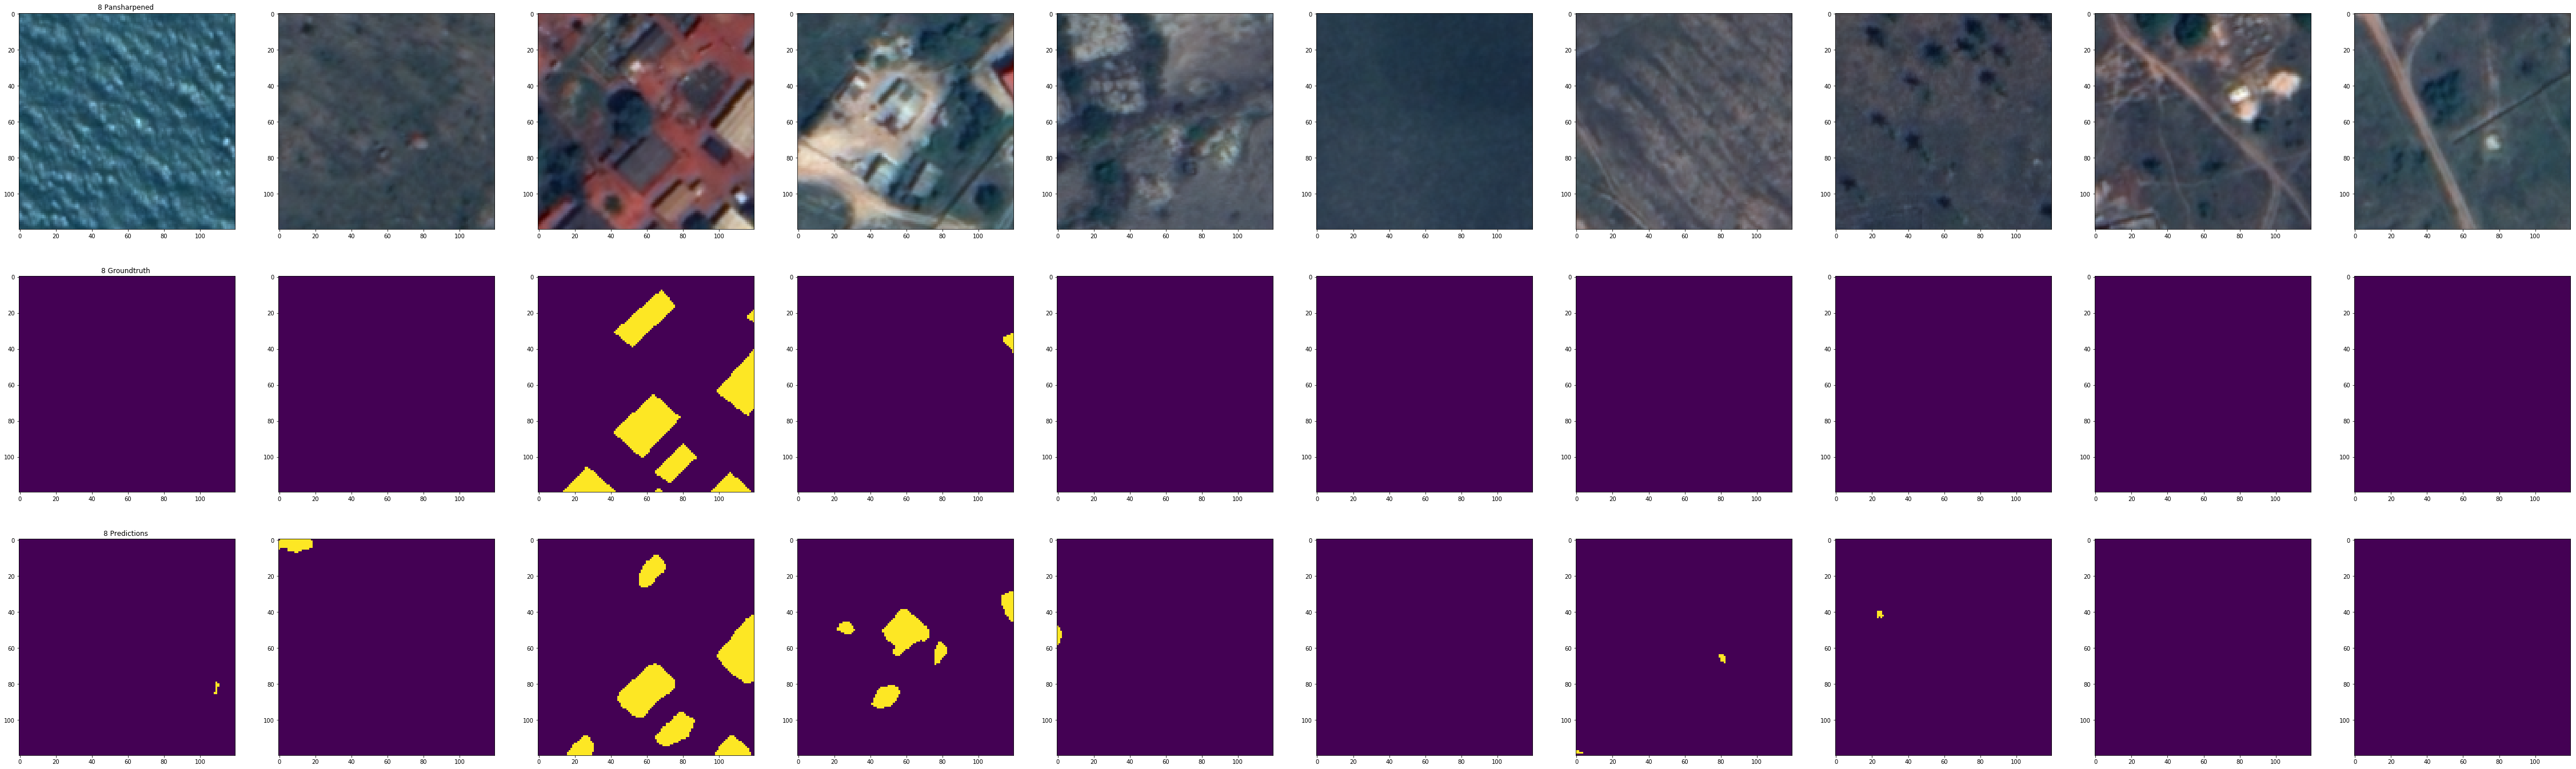

Image 0, Validation IoU 0.3281, Validation IoU_acc 41.6667%,Validation F1 IoU 52.6316%, loss 11.69956779
Image 1, Validation IoU 0.6469, Validation IoU_acc 75.0000%,Validation F1 IoU 66.6667%, loss 11.42412758
Image 2, Validation IoU 0.4970, Validation IoU_acc 66.6667%,Validation F1 IoU 66.6667%, loss 12.41315842
Image 3, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.46969604
Image 4, Validation IoU 0.9994, Validation IoU_acc 100.0000%,Validation F1 IoU 66.6667%, loss 12.30210304
Image 5, Validation IoU 0.9999, Validation IoU_acc 100.0000%,Validation F1 IoU 66.6667%, loss 12.29239845
Image 6, Validation IoU 0.9931, Validation IoU_acc 100.0000%,Validation F1 IoU 66.6667%, loss 12.28268909
Image 7, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.54596329
Image 8, Validation IoU 0.7866, Validation IoU_acc 100.0000%,Validation F1 IoU 75.0000%, loss 11.88070679
Image 9, Validation IoU 0.8413, Validation IoU_

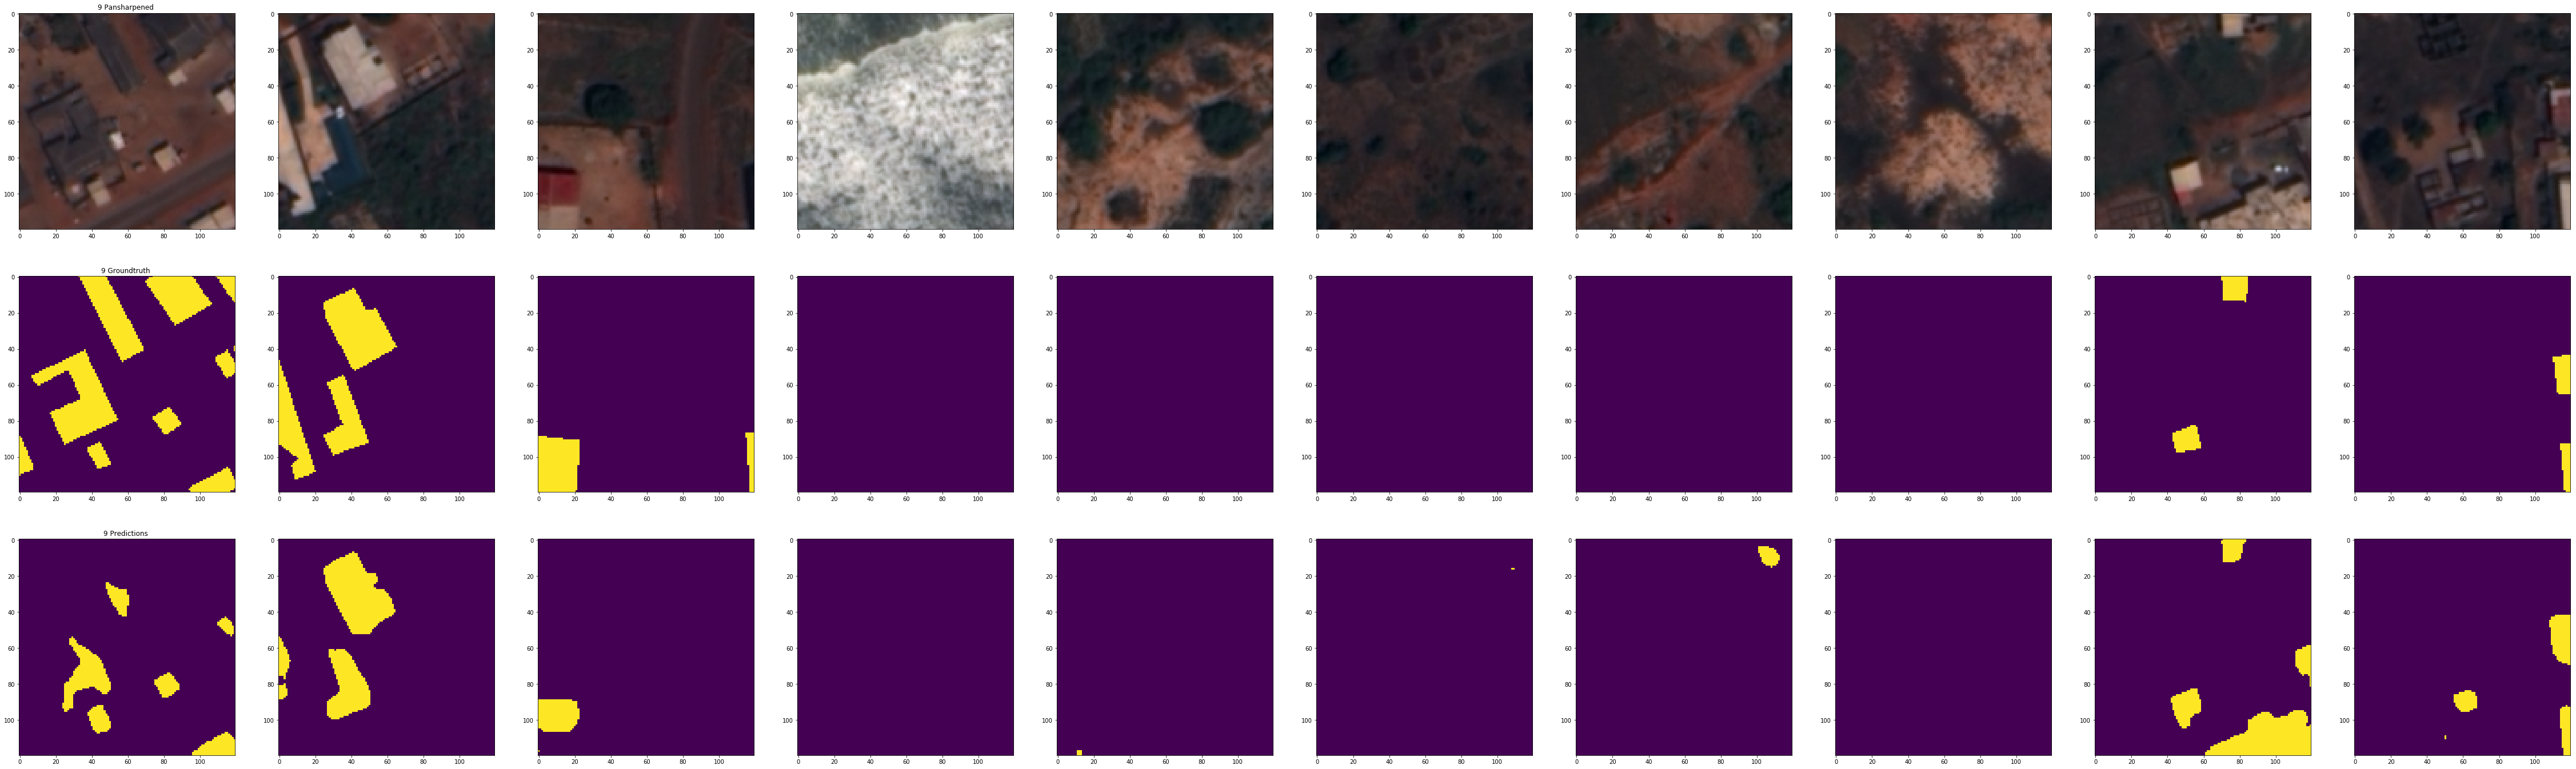

Image 0, Validation IoU 0.9630, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.57239819
Image 1, Validation IoU 0.8584, Validation IoU_acc 100.0000%,Validation F1 IoU 80.0000%, loss 11.99724388
Image 2, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.72289276
Image 3, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.25622845
Image 4, Validation IoU 0.9991, Validation IoU_acc 100.0000%,Validation F1 IoU 66.6667%, loss 12.34095192
Image 5, Validation IoU 0.9885, Validation IoU_acc 100.0000%,Validation F1 IoU 33.3333%, loss 12.01675797
Image 6, Validation IoU 0.9999, Validation IoU_acc 100.0000%,Validation F1 IoU 66.6667%, loss 12.30918503
Image 7, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.34618664
Image 8, Validation IoU 0.9681, Validation IoU_acc 100.0000%,Validation F1 IoU 66.6667%, loss 12.31104565
Image 9, Validation IoU 1.0000, Validation

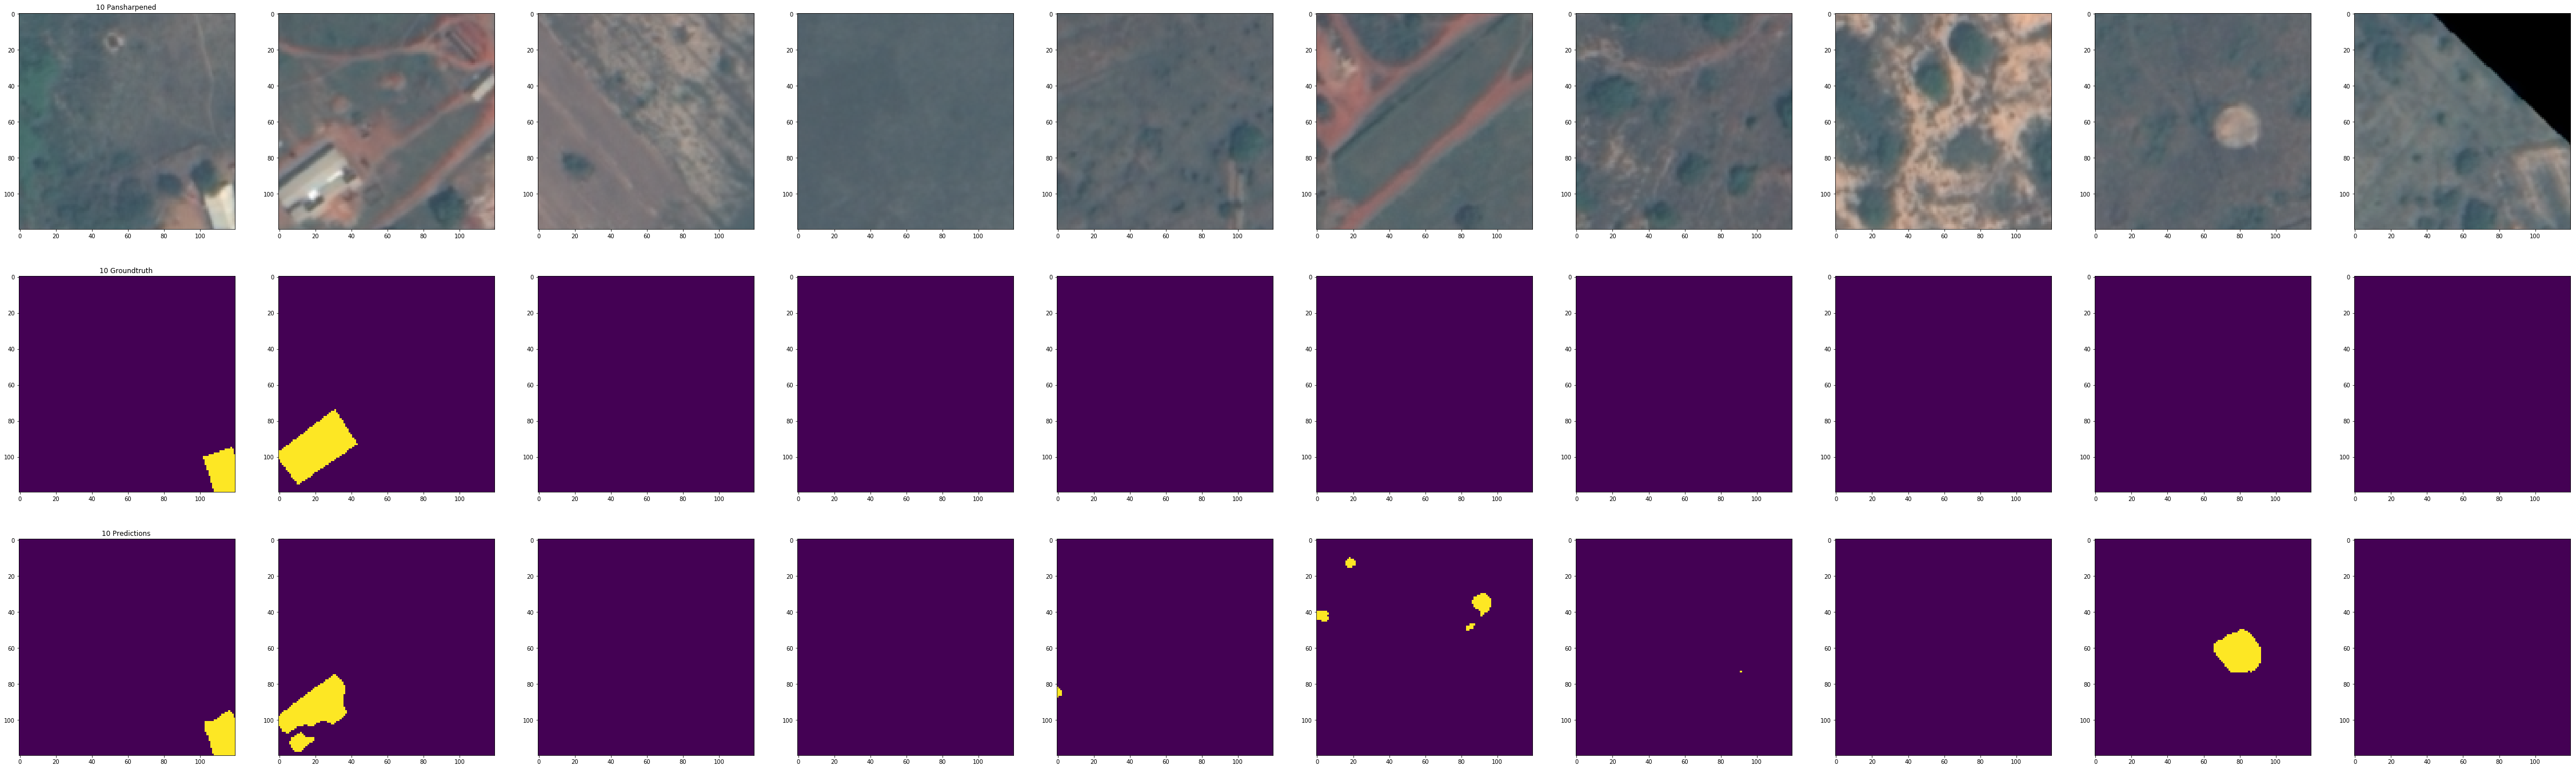

Image 0, Validation IoU 0.3575, Validation IoU_acc 40.0000%,Validation F1 IoU 50.0000%, loss 11.96914291
Image 1, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.55057812
Image 2, Validation IoU 0.6350, Validation IoU_acc 85.7143%,Validation F1 IoU 85.7143%, loss 11.42980003
Image 3, Validation IoU 0.8729, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.24082661
Image 4, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.18501472
Image 5, Validation IoU 0.9978, Validation IoU_acc 100.0000%,Validation F1 IoU 40.0000%, loss 12.46022415
Image 6, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.59389782
Image 7, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.73295116
Image 8, Validation IoU 0.2002, Validation IoU_acc 25.0000%,Validation F1 IoU 20.0000%, loss 11.91951180
Image 9, Validation IoU 1.0000, Validation I

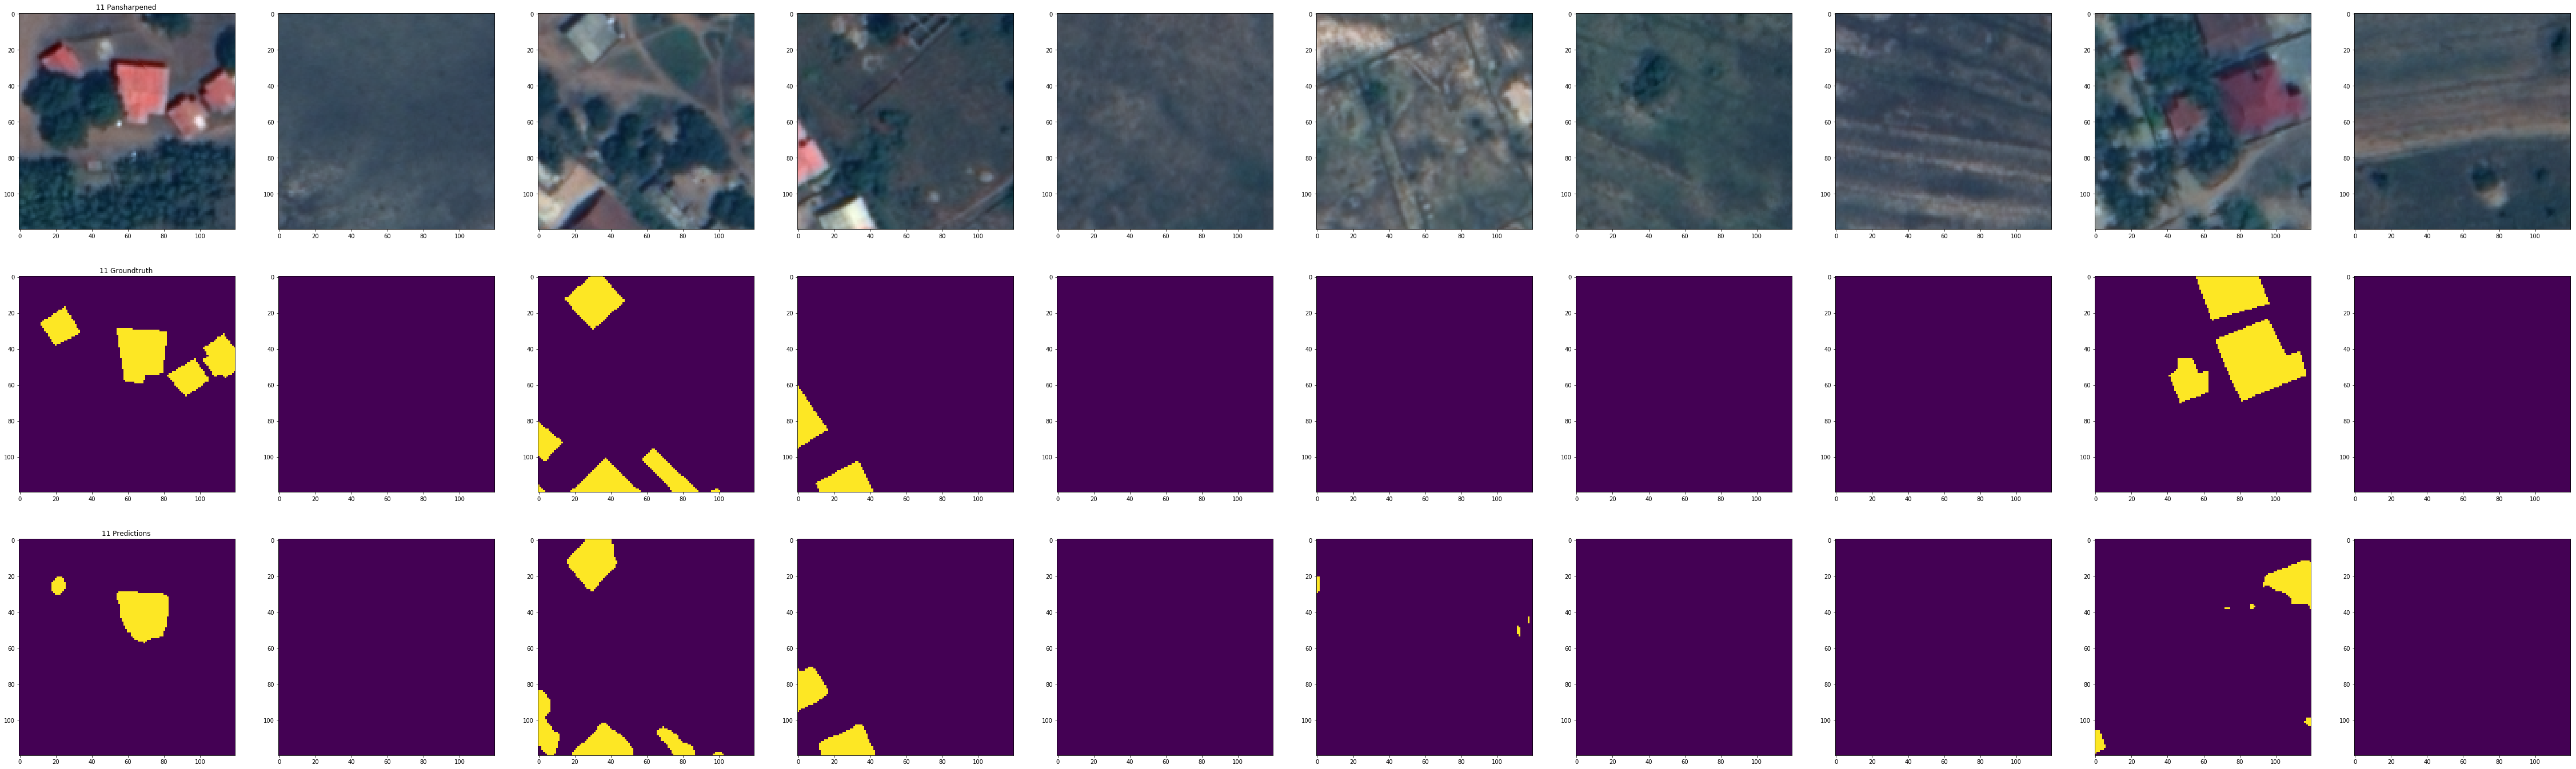

Image 0, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.90146923
Image 1, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.16486359
Image 2, Validation IoU 0.9741, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.46284008
Image 3, Validation IoU 0.8386, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.27914524
Image 4, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.21936226
Image 5, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.37201405
Image 6, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.44007301
Image 7, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.25739193
Image 8, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.24302959
Image 9, Validation IoU 1.0000, Valid

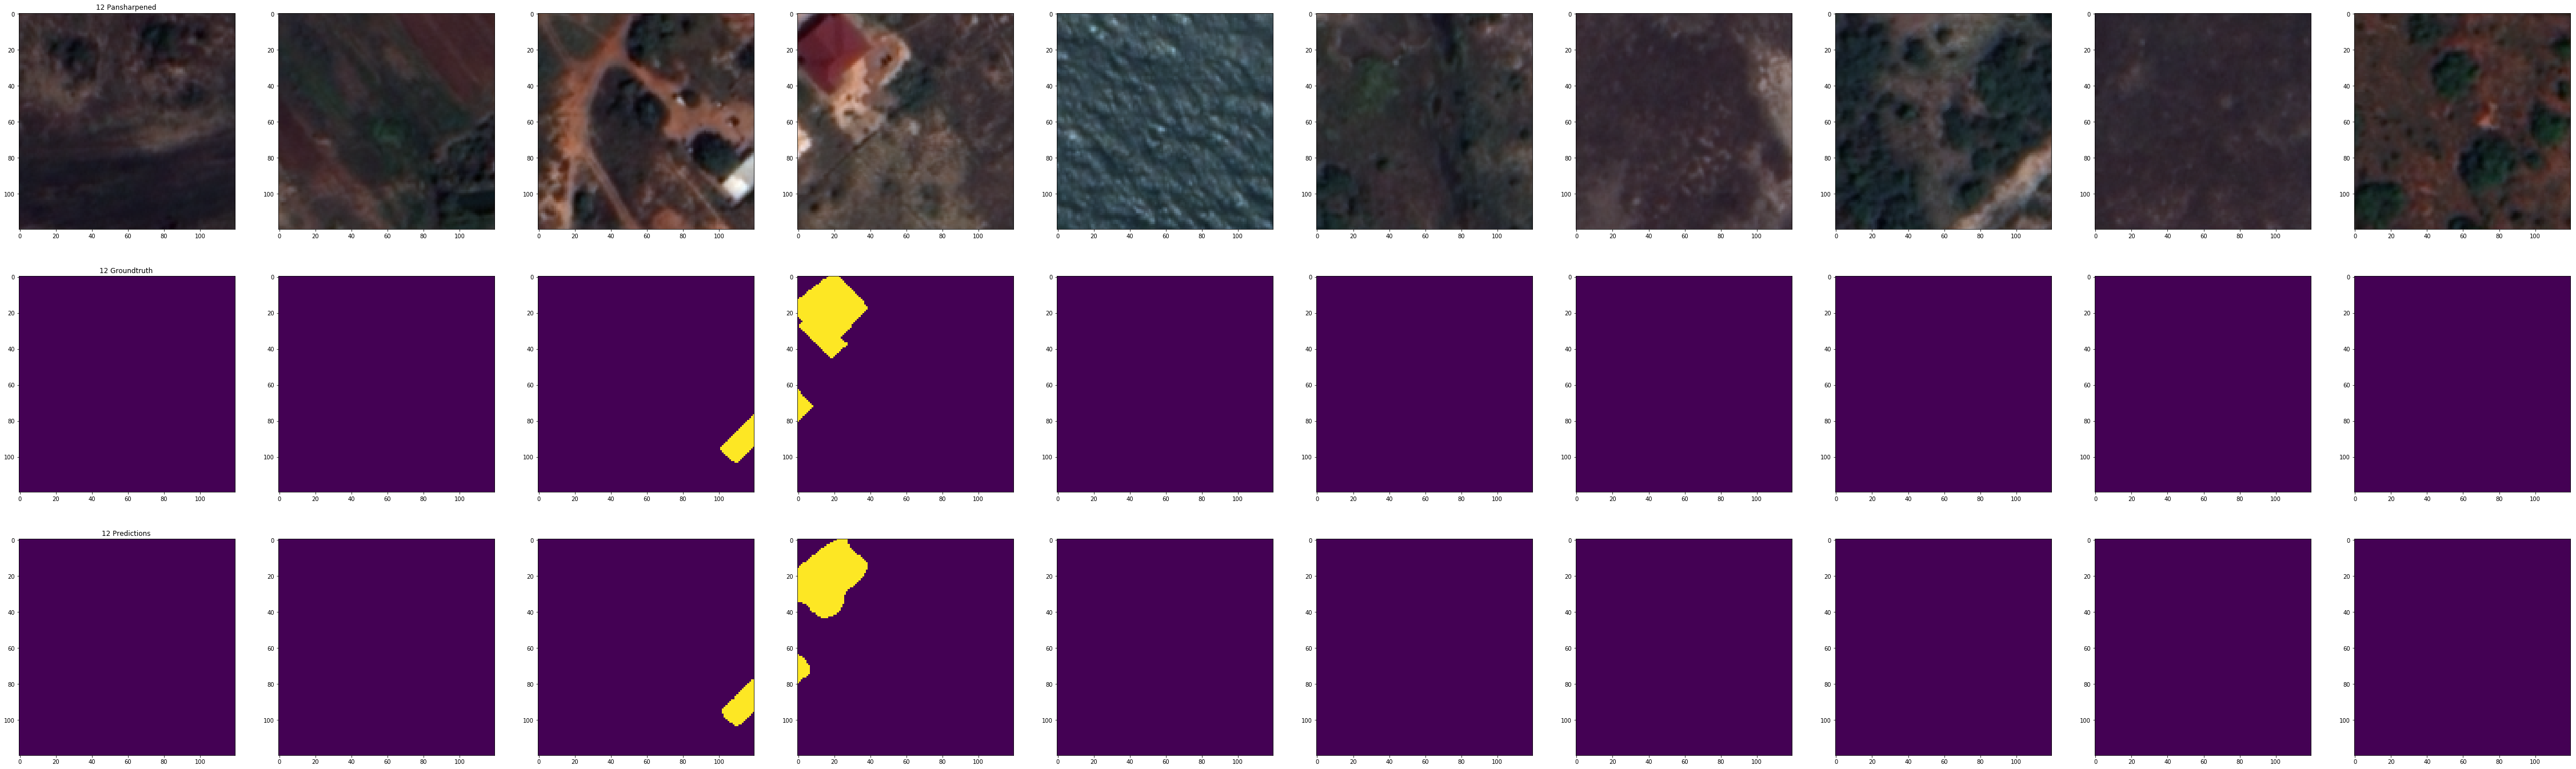

Image 0, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.44440460
Image 1, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.58388710
Image 2, Validation IoU 0.9885, Validation IoU_acc 100.0000%,Validation F1 IoU 50.0000%, loss 12.49317455
Image 3, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.41369534
Image 4, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.40597630
Image 5, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.43221855
Image 6, Validation IoU 0.9348, Validation IoU_acc 100.0000%,Validation F1 IoU 66.6667%, loss 12.12055969
Image 7, Validation IoU 0.9893, Validation IoU_acc 100.0000%,Validation F1 IoU 50.0000%, loss 12.30791950
Image 8, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.52402973
Image 9, Validation IoU 1.0000, Validati

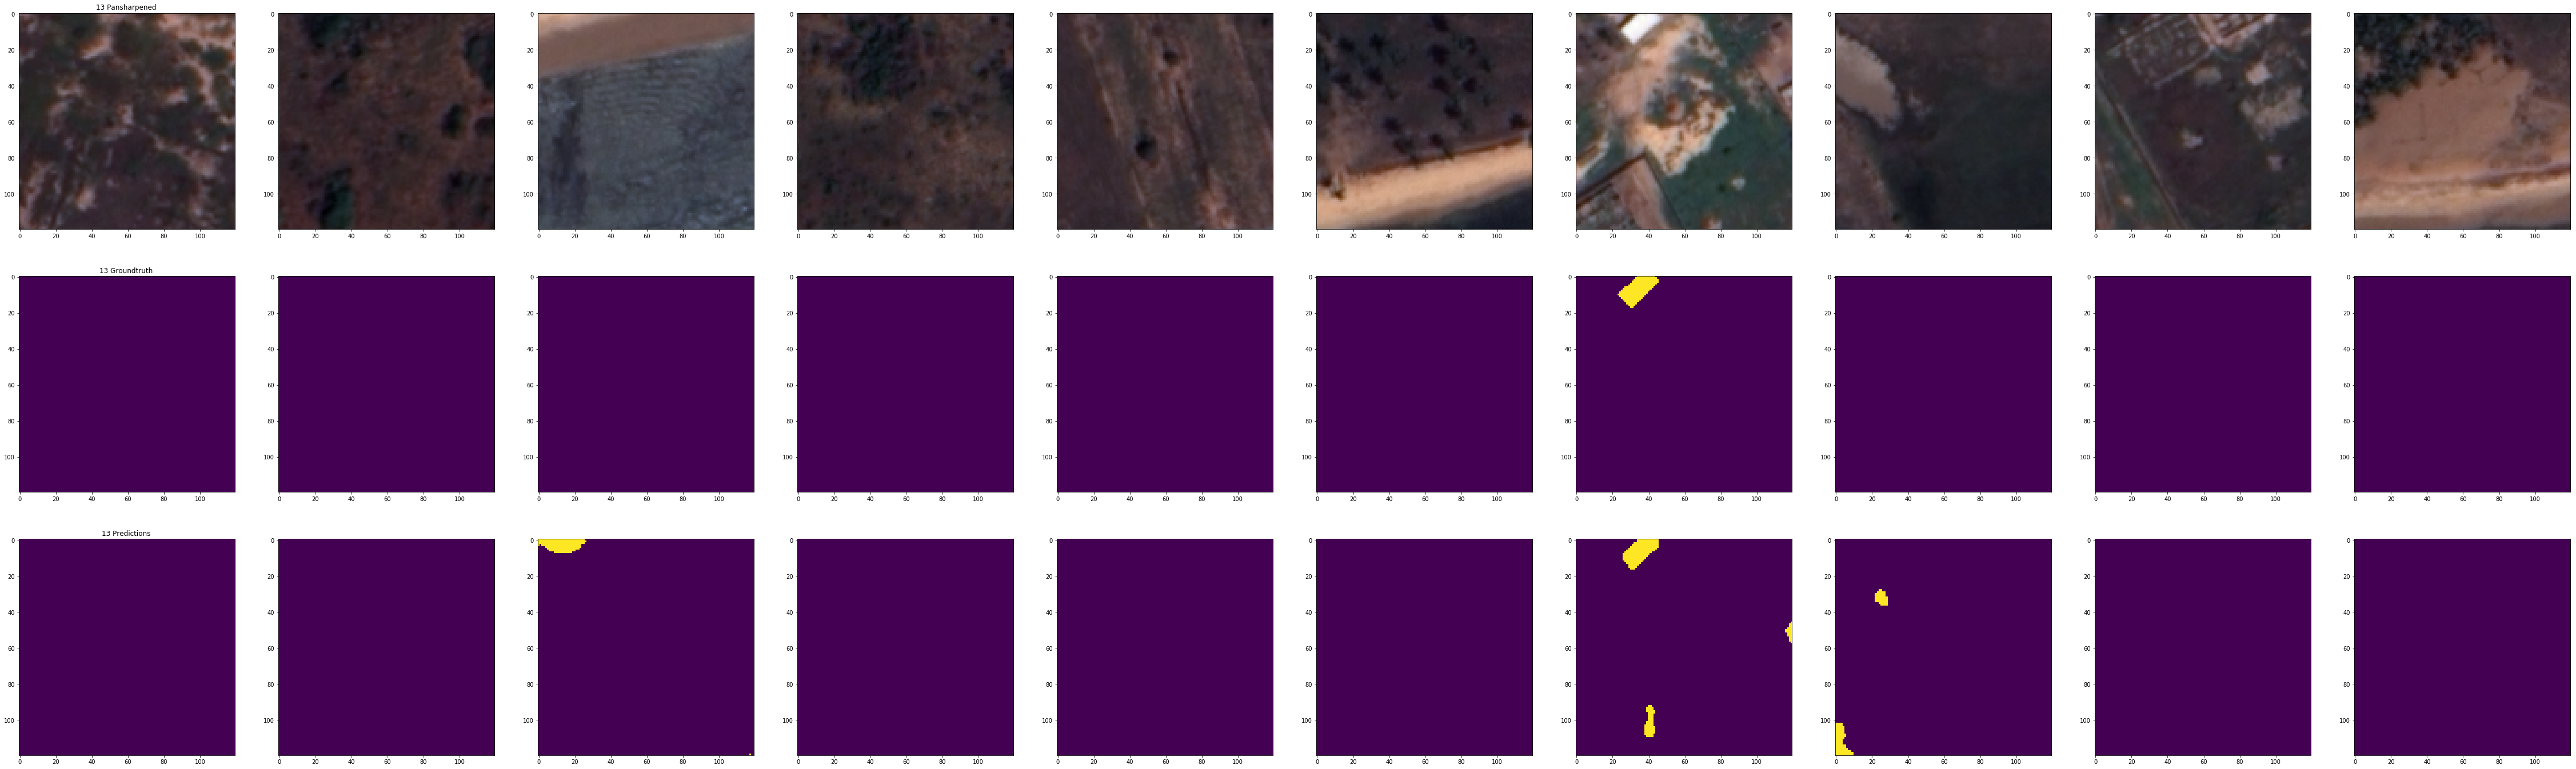

Image 0, Validation IoU 0.3315, Validation IoU_acc 33.3333%,Validation F1 IoU 40.0000%, loss 12.43244839
Image 1, Validation IoU 0.9308, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.47138882
Image 2, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.25272751
Image 3, Validation IoU 0.9997, Validation IoU_acc 100.0000%,Validation F1 IoU 66.6667%, loss 12.34704781
Image 4, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.56341553
Image 5, Validation IoU 0.9935, Validation IoU_acc 100.0000%,Validation F1 IoU 40.0000%, loss 12.42586803
Image 6, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.28424740
Image 7, Validation IoU 0.9994, Validation IoU_acc 100.0000%,Validation F1 IoU 66.6667%, loss 12.45077038
Image 8, Validation IoU 0.9921, Validation IoU_acc 100.0000%,Validation F1 IoU 22.2222%, loss 11.90373325
Image 9, Validation IoU 1.0000, Validation 

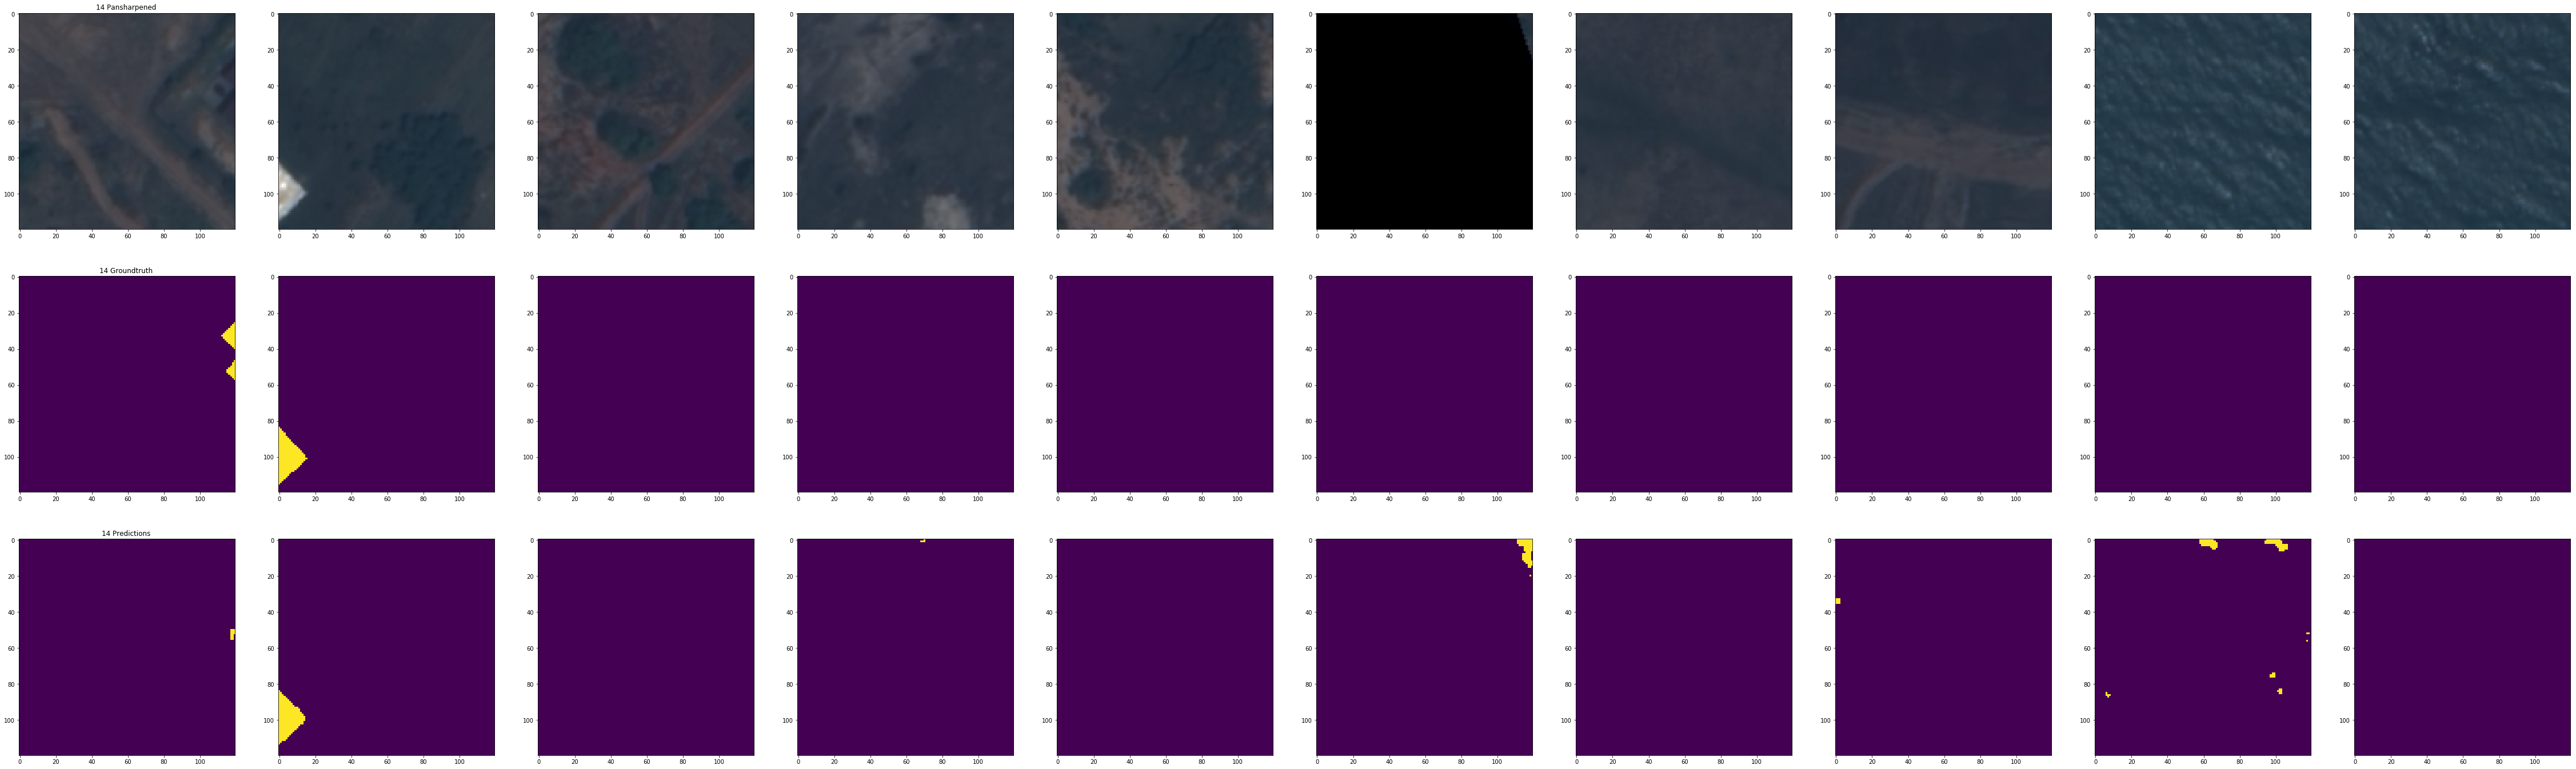

Image 0, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.34788132
Image 1, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.33422947
Image 2, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.28005219
Image 3, Validation IoU 0.9998, Validation IoU_acc 100.0000%,Validation F1 IoU 66.6667%, loss 12.44209671
Image 4, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.25149918
Image 5, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.38901138
Image 6, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.55421448
Image 7, Validation IoU 0.9340, Validation IoU_acc 100.0000%,Validation F1 IoU 80.0000%, loss 12.23148346
Image 8, Validation IoU 0.9227, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.09487915
Image 9, Validation IoU 1.0000, Validat

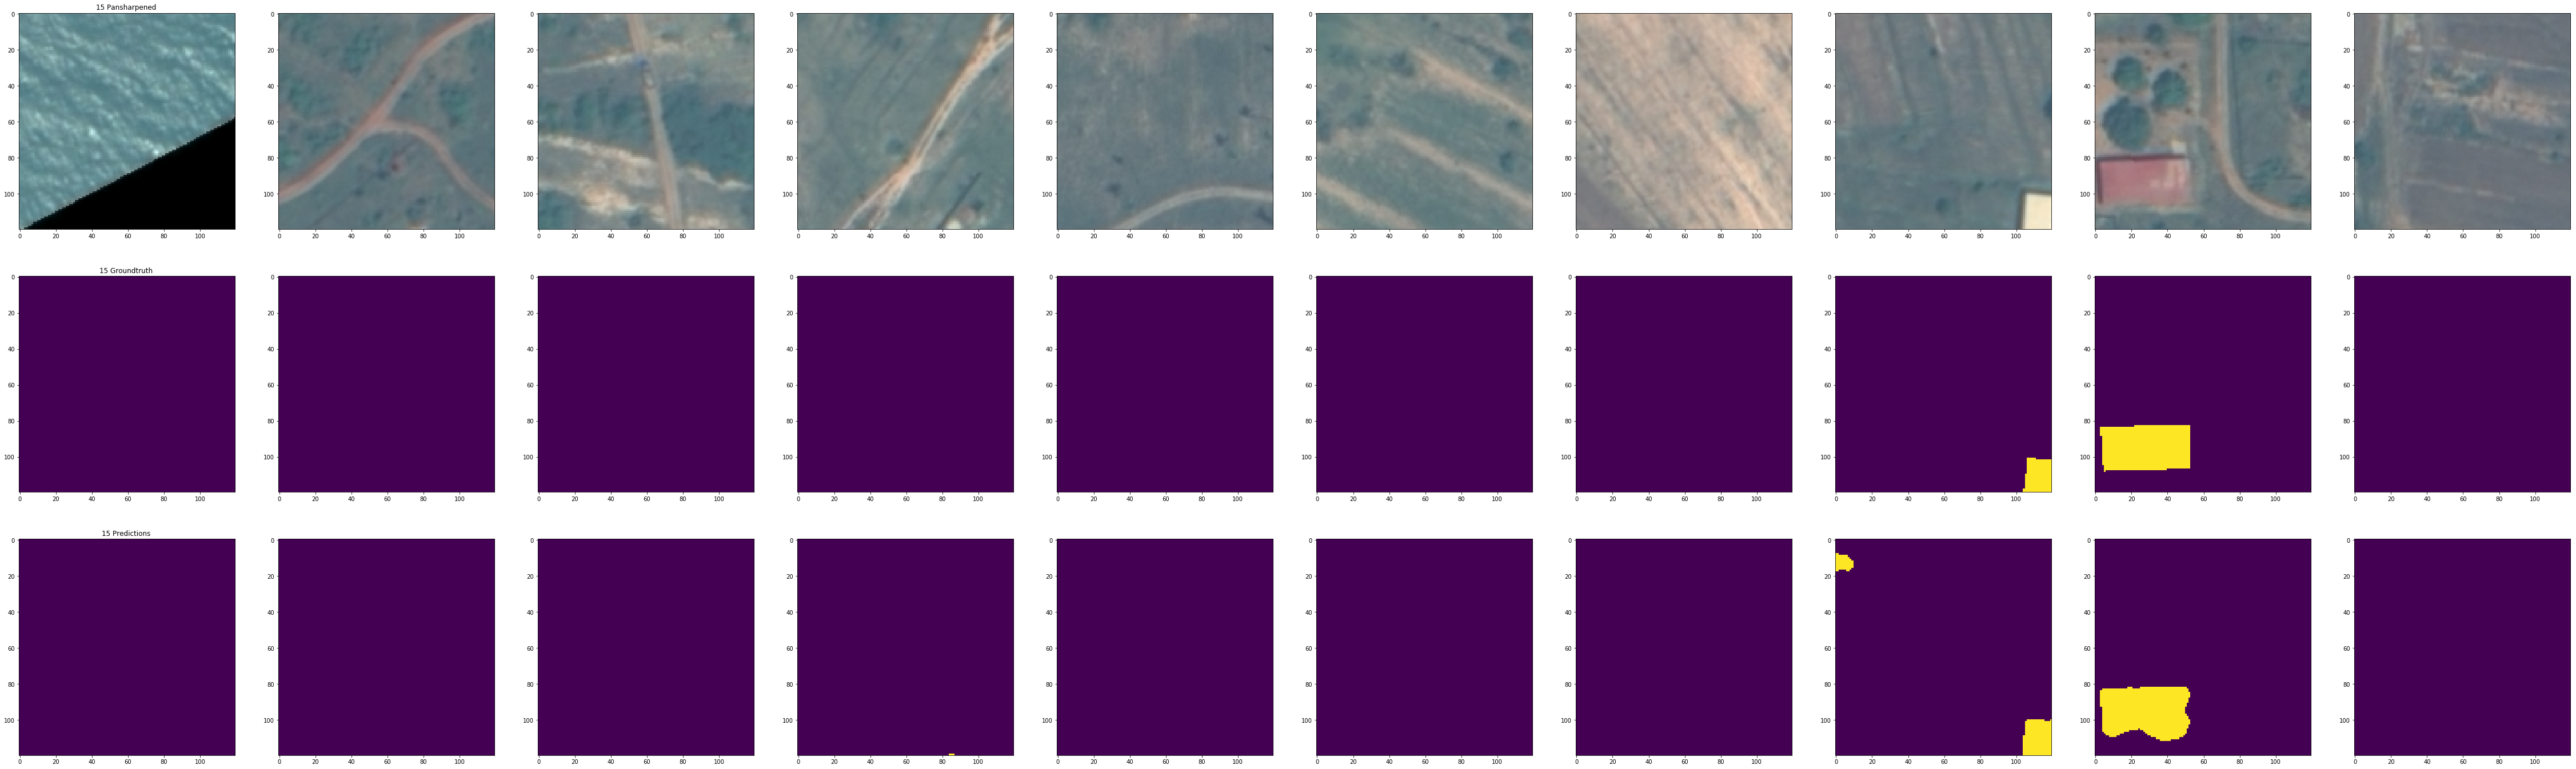

Image 0, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.73052502
Image 1, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.46010590
Image 2, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.34440994
Image 3, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.55551434
Image 4, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.37141132
Image 5, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.48000240
Image 6, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.32486343
Image 7, Validation IoU 0.6073, Validation IoU_acc 75.0000%,Validation F1 IoU 75.0000%, loss 11.60253048
Image 8, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.55520630
Image 9, Validation IoU 1.0000, Validat

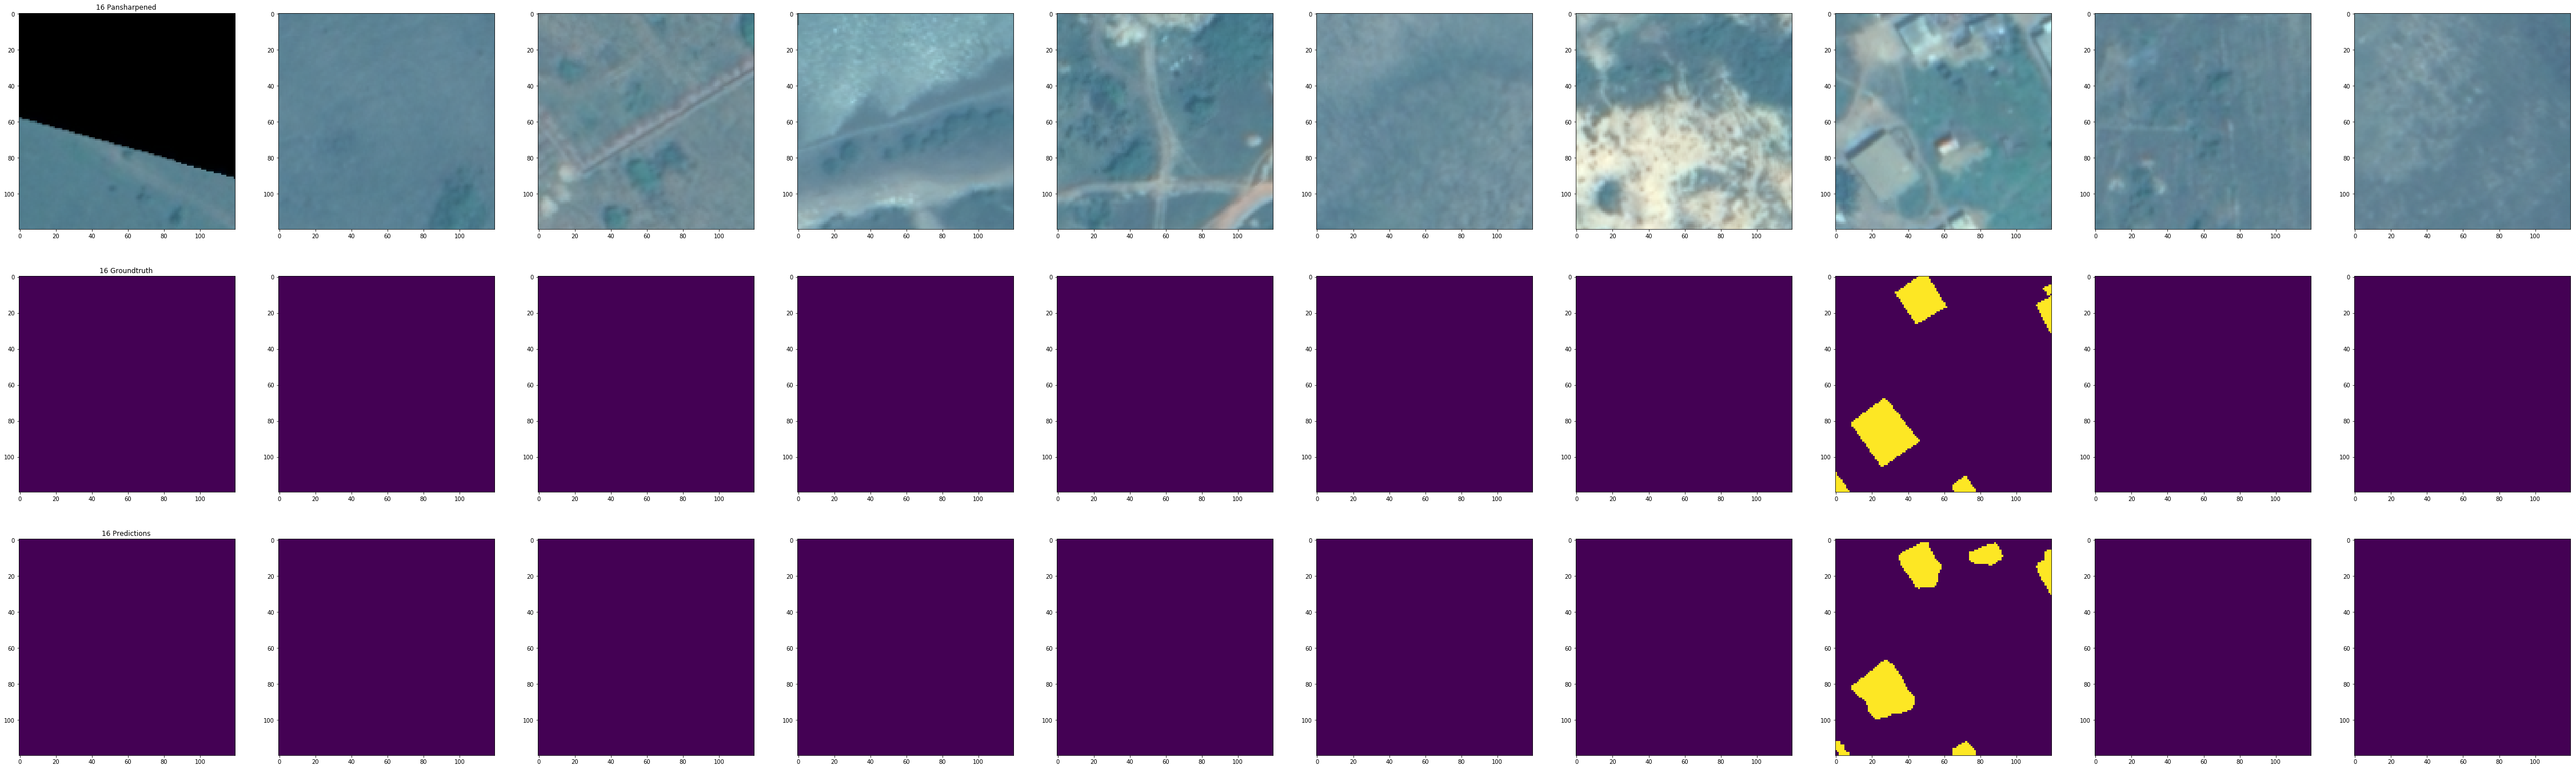

Image 0, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.29292965
Image 1, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.52671432
Image 2, Validation IoU 0.9784, Validation IoU_acc 100.0000%,Validation F1 IoU 50.0000%, loss 12.18803406
Image 3, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.75022507
Image 4, Validation IoU 0.7960, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.03876877
Image 5, Validation IoU 0.9997, Validation IoU_acc 100.0000%,Validation F1 IoU 66.6667%, loss 12.29991722
Image 6, Validation IoU 0.4369, Validation IoU_acc 50.0000%,Validation F1 IoU 40.0000%, loss 12.10237408
Image 7, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.49310112
Image 8, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.25606346
Image 9, Validation IoU 1.0000, Validatio

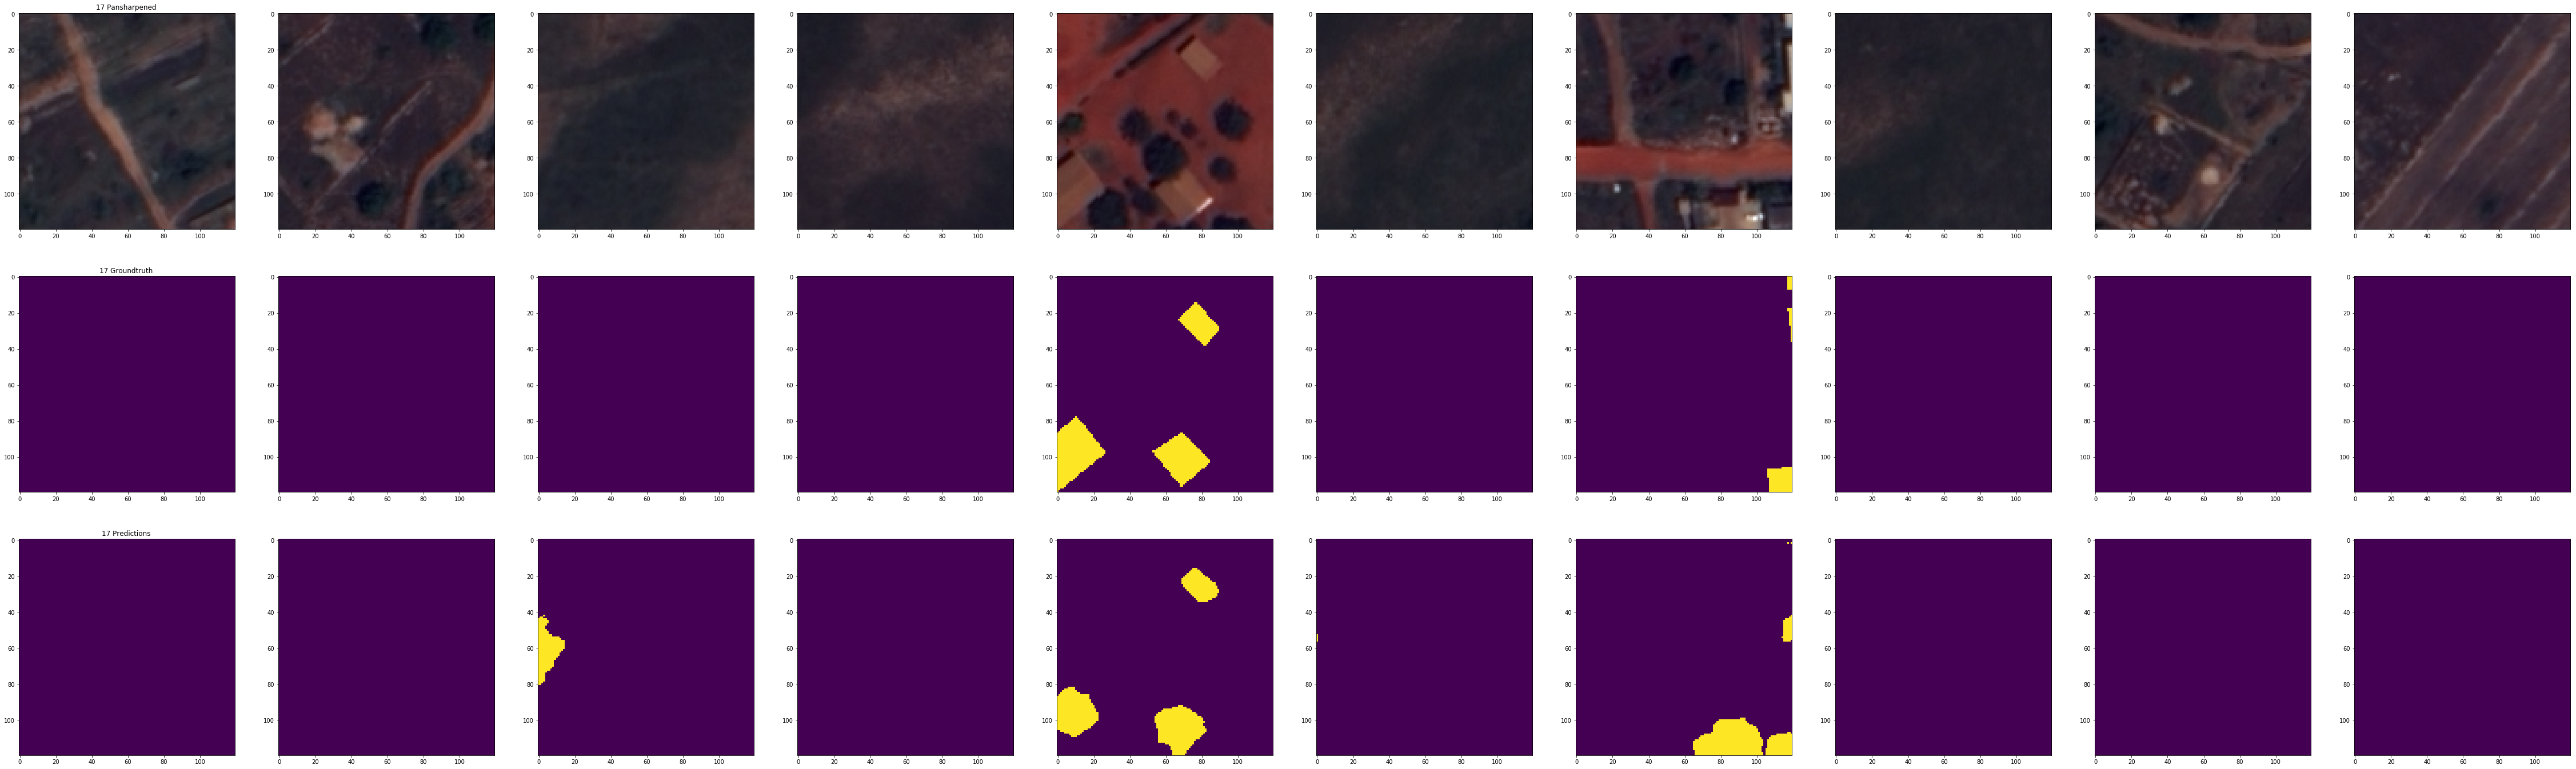

Image 0, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.32188606
Image 1, Validation IoU 0.9994, Validation IoU_acc 100.0000%,Validation F1 IoU 66.6667%, loss 12.26233101
Image 2, Validation IoU 0.9826, Validation IoU_acc 100.0000%,Validation F1 IoU 66.6667%, loss 12.23799038
Image 3, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.41485023
Image 4, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.56976128
Image 5, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.64000511
Image 6, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.70434666
Image 7, Validation IoU 0.8406, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.06250191
Image 8, Validation IoU 0.9990, Validation IoU_acc 100.0000%,Validation F1 IoU 66.6667%, loss 12.38173389
Image 9, Validation IoU 1.0000, Validati

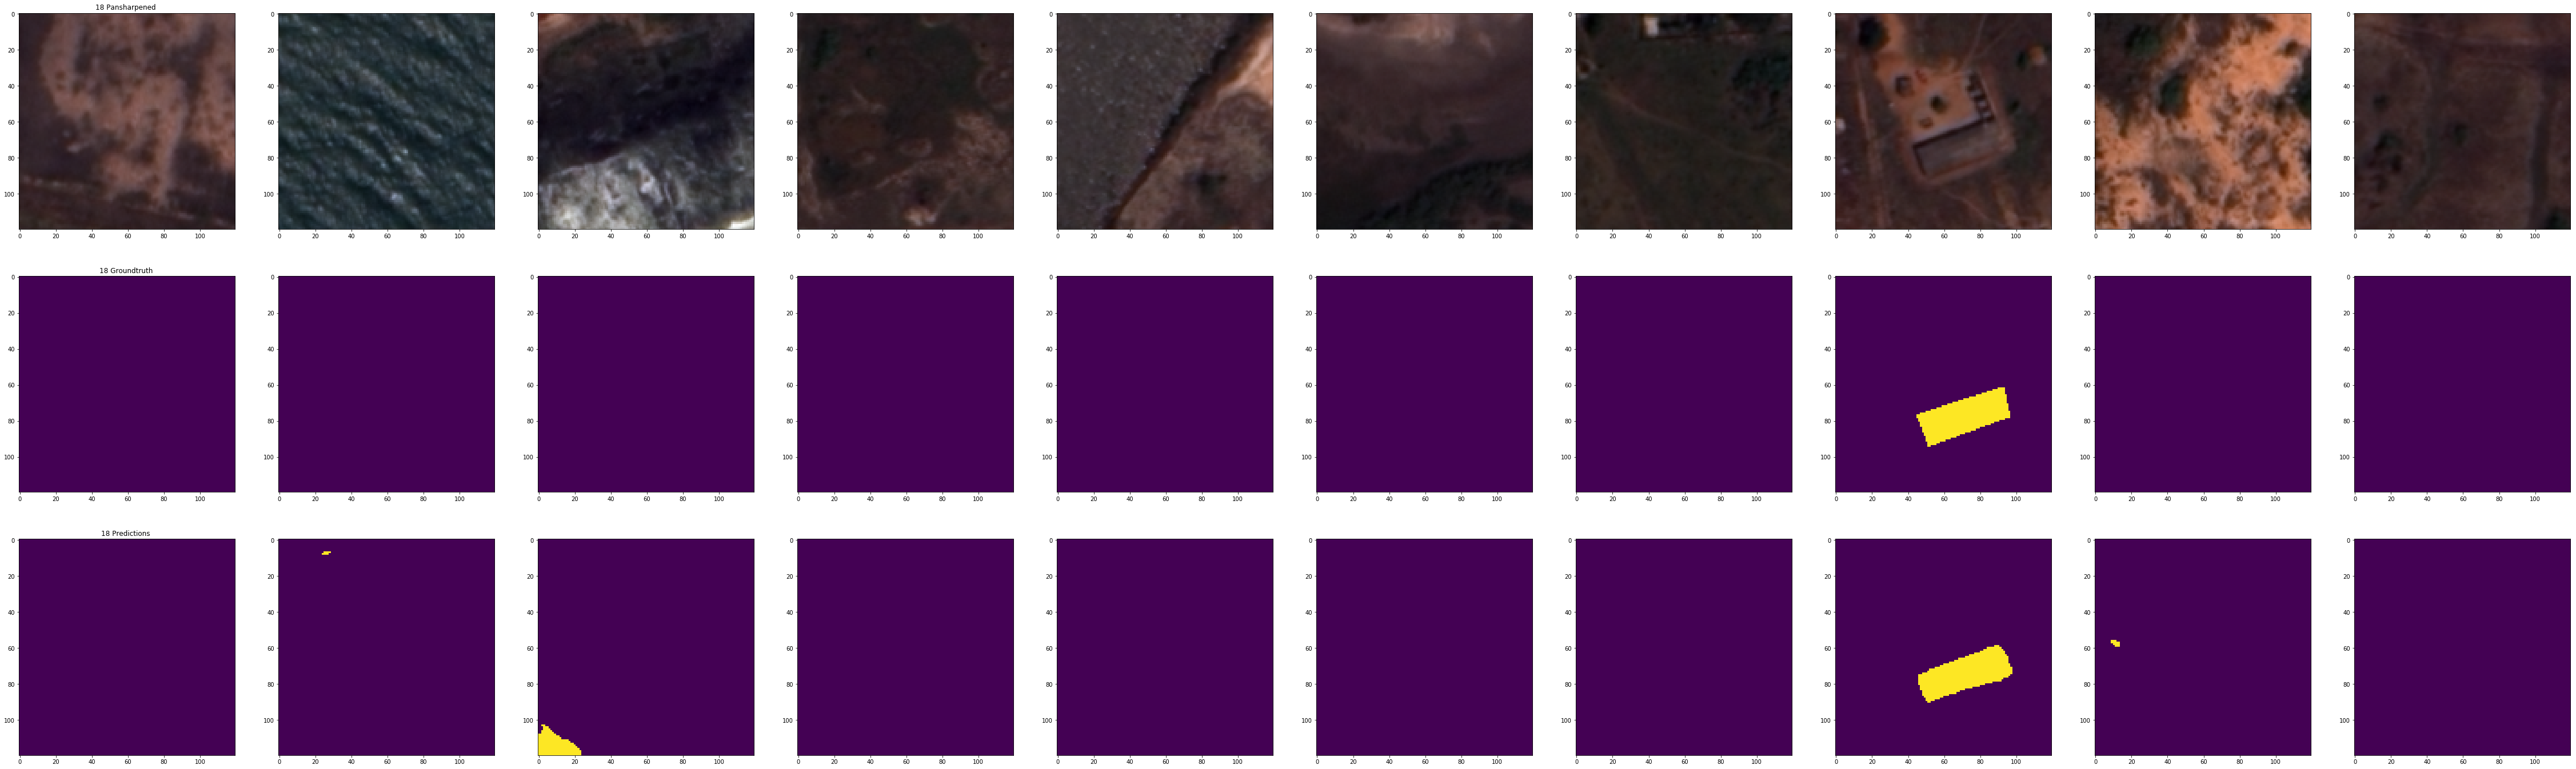

Image 0, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.50762844
Image 1, Validation IoU 0.2361, Validation IoU_acc 37.5000%,Validation F1 IoU 35.2941%, loss 12.09737587
Image 2, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.54092121
Image 3, Validation IoU 0.9978, Validation IoU_acc 100.0000%,Validation F1 IoU 66.6667%, loss 12.14752674
Image 4, Validation IoU 0.8637, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 11.82498264
Image 5, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.66333961
Image 6, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.27898407
Image 7, Validation IoU 0.9997, Validation IoU_acc 100.0000%,Validation F1 IoU 66.6667%, loss 12.31749535
Image 8, Validation IoU 1.0000, Validation IoU_acc 100.0000%,Validation F1 IoU 100.0000%, loss 12.46412563
Image 9, Validation IoU 1.0000, Validatio

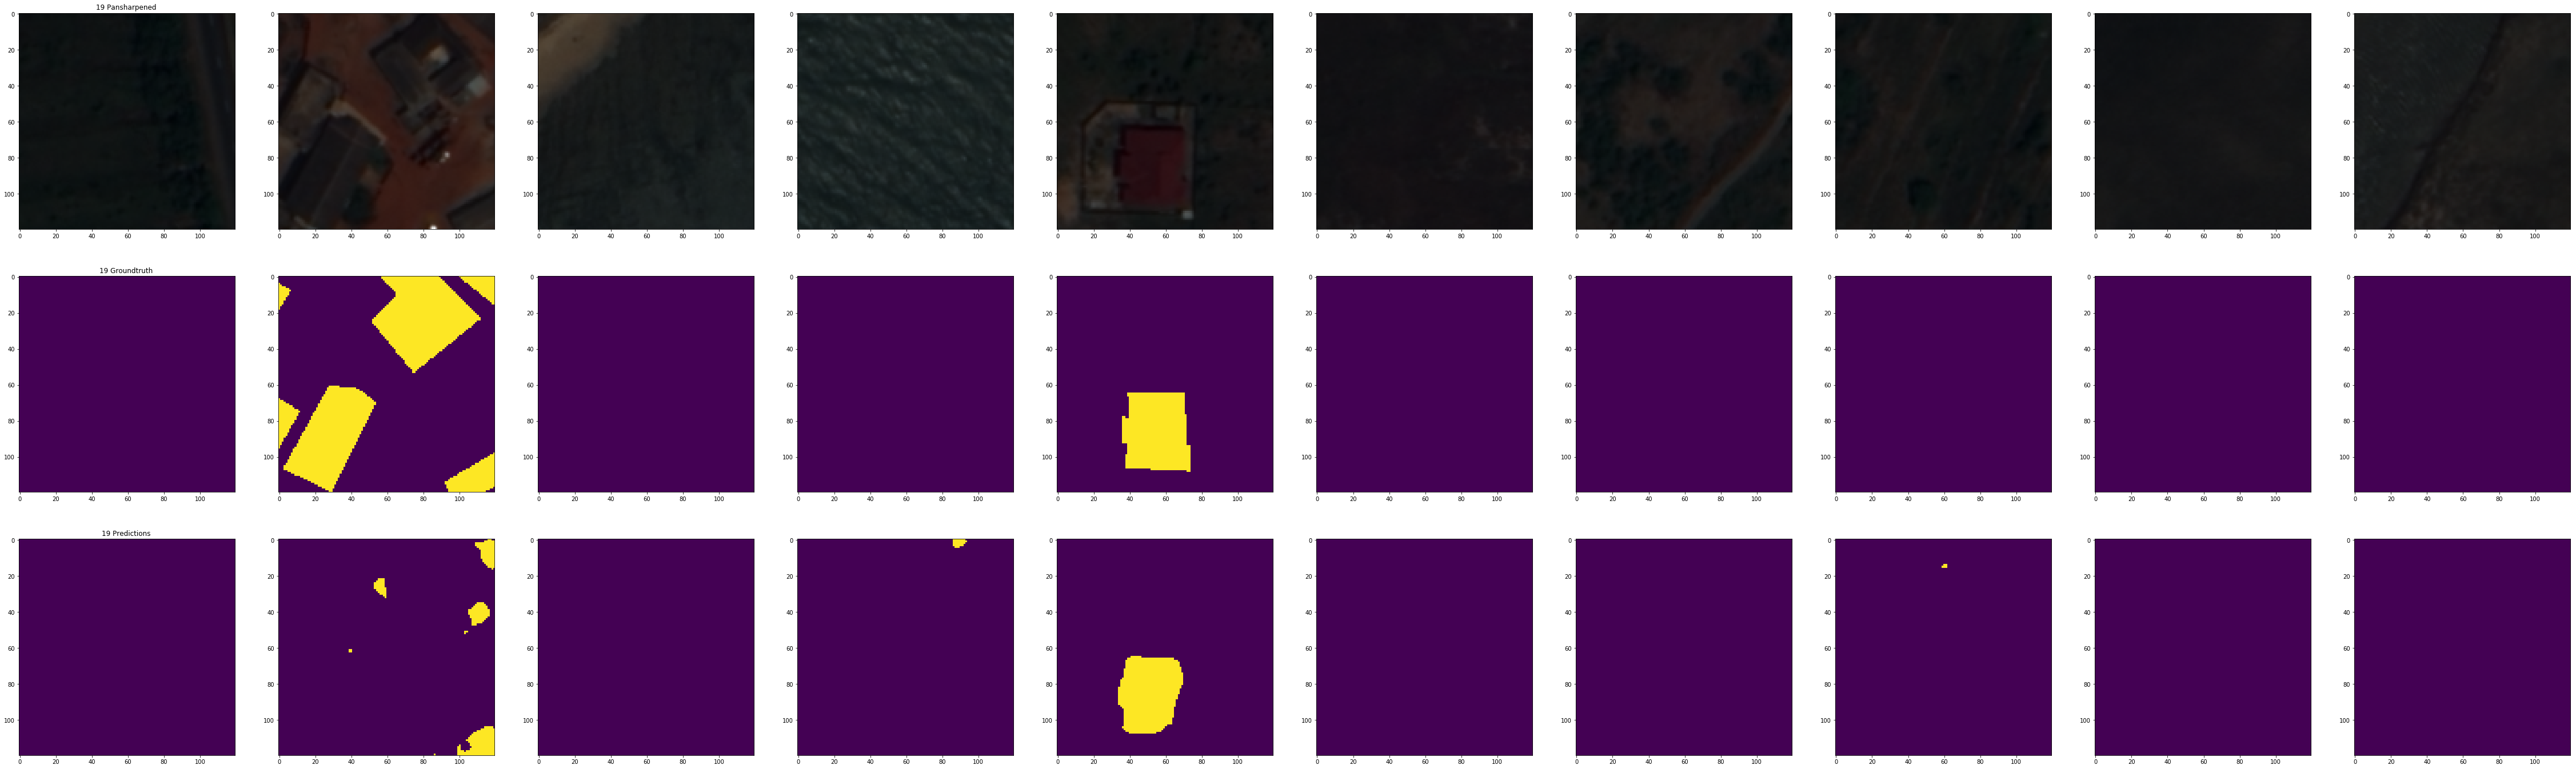

In [28]:
if __name__ == '__main__':

    root_folder = '../DATA_GHANA/DATASET/120_x_120_8_bands/'
    prediction_path='VISUALIZATION_IMAGES/TENSORFLOW_MELI_GHANA/'

    if not os.path.exists(prediction_path):
            os.makedirs(prediction_path)
            
            
#     'MODEL_BASIC_TEST_120/RESUNET_BASIC_ghana_tf_meli_restored_120.ckpt-200'
    predict_tf(root_folder+'TEST/',10,20,'MODEL_pansh_8_bs_8/resunet_pansh_8_bs_8.ckpt-148500',prediction_path)
    